In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time

In [2]:
from keras.models import load_model
model = load_model('cnn_best_model.h5')

In [3]:
df = pd.read_csv('ToN-IoT_balanced_smote.csv')

In [4]:
X = df.drop(['type','label'], axis=1)
y = df['type']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [5]:
X_test2 = np.squeeze(X_test)
X_test2.shape
X_train2 = np.squeeze(X_train)
X_train2.shape

(2400000, 111)

In [6]:
#use SHAP to explain the model
import tensorflow as tf
import shap
shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_train2[0:100])
shape_values = explainer.shap_values(X_test2[0:1000])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

6582/6582 [==============================] - 24s 4ms/step


  0%|          | 1/1000 [00:30<8:22:48, 30.20s/it]

6582/6582 [==============================] - 22s 3ms/step


  0%|          | 2/1000 [00:57<7:54:06, 28.50s/it]

6582/6582 [==============================] - 19s 3ms/step


  0%|          | 3/1000 [01:22<7:26:40, 26.88s/it]

6582/6582 [==============================] - 18s 3ms/step


  0%|          | 4/1000 [01:47<7:11:12, 25.98s/it]

6582/6582 [==============================] - 21s 3ms/step


  0%|          | 5/1000 [02:13<7:15:09, 26.24s/it]

6582/6582 [==============================] - 25s 4ms/step


  1%|          | 6/1000 [02:44<7:41:16, 27.84s/it]

6582/6582 [==============================] - 22s 3ms/step


  1%|          | 7/1000 [03:12<7:42:58, 27.97s/it]

6582/6582 [==============================] - 22s 3ms/step


  1%|          | 8/1000 [03:40<7:37:57, 27.70s/it]

6582/6582 [==============================] - 23s 4ms/step


  1%|          | 9/1000 [04:08<7:42:39, 28.01s/it]

6582/6582 [==============================] - 24s 4ms/step


  1%|          | 10/1000 [04:38<7:51:57, 28.60s/it]

6582/6582 [==============================] - 23s 4ms/step


  1%|          | 11/1000 [05:07<7:53:09, 28.71s/it]

6582/6582 [==============================] - 23s 3ms/step


  1%|          | 12/1000 [05:35<7:49:19, 28.50s/it]

6582/6582 [==============================] - 24s 4ms/step


  1%|▏         | 13/1000 [06:05<7:53:42, 28.80s/it]

6582/6582 [==============================] - 24s 4ms/step


  1%|▏         | 14/1000 [06:34<7:55:26, 28.93s/it]

6582/6582 [==============================] - 22s 3ms/step


  2%|▏         | 15/1000 [07:02<7:48:25, 28.53s/it]

6588/6588 [==============================] - 23s 4ms/step


  2%|▏         | 16/1000 [07:31<7:52:47, 28.83s/it]

6582/6582 [==============================] - 23s 3ms/step


  2%|▏         | 17/1000 [07:59<7:47:40, 28.55s/it]

6582/6582 [==============================] - 23s 3ms/step


  2%|▏         | 18/1000 [08:28<7:48:53, 28.65s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▏         | 19/1000 [08:57<7:52:01, 28.87s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▏         | 20/1000 [09:26<7:53:23, 28.98s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▏         | 21/1000 [09:56<7:55:16, 29.13s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▏         | 22/1000 [10:25<7:53:00, 29.02s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▏         | 23/1000 [10:54<7:52:40, 29.03s/it]

6582/6582 [==============================] - 23s 3ms/step


  2%|▏         | 24/1000 [11:21<7:46:03, 28.65s/it]

6582/6582 [==============================] - 24s 4ms/step


  2%|▎         | 25/1000 [11:50<7:45:31, 28.65s/it]

6582/6582 [==============================] - 24s 4ms/step


  3%|▎         | 26/1000 [12:20<7:51:17, 29.03s/it]

6582/6582 [==============================] - 24s 4ms/step


  3%|▎         | 27/1000 [12:50<7:55:54, 29.35s/it]

6588/6588 [==============================] - 25s 4ms/step


  3%|▎         | 28/1000 [13:21<8:03:36, 29.85s/it]

6582/6582 [==============================] - 23s 3ms/step


  3%|▎         | 29/1000 [13:49<7:55:41, 29.39s/it]

6582/6582 [==============================] - 25s 4ms/step


  3%|▎         | 30/1000 [14:19<7:57:41, 29.55s/it]

6582/6582 [==============================] - 26s 4ms/step


  3%|▎         | 31/1000 [14:51<8:09:35, 30.32s/it]

6582/6582 [==============================] - 24s 4ms/step


  3%|▎         | 32/1000 [15:21<8:07:31, 30.22s/it]

6582/6582 [==============================] - 24s 4ms/step


  3%|▎         | 33/1000 [15:51<8:01:39, 29.89s/it]

6582/6582 [==============================] - 24s 4ms/step


  3%|▎         | 34/1000 [16:20<7:59:58, 29.81s/it]

6582/6582 [==============================] - 23s 4ms/step


  4%|▎         | 35/1000 [16:49<7:55:47, 29.58s/it]

6582/6582 [==============================] - 24s 4ms/step


  4%|▎         | 36/1000 [17:19<7:55:36, 29.60s/it]

6582/6582 [==============================] - 24s 4ms/step


  4%|▎         | 37/1000 [17:48<7:51:56, 29.40s/it]

6582/6582 [==============================] - 24s 4ms/step


  4%|▍         | 38/1000 [18:17<7:51:33, 29.41s/it]

6582/6582 [==============================] - 23s 4ms/step


  4%|▍         | 39/1000 [18:46<7:48:35, 29.26s/it]

6588/6588 [==============================] - 24s 4ms/step


  4%|▍         | 40/1000 [19:16<7:50:36, 29.41s/it]

6582/6582 [==============================] - 22s 3ms/step


  4%|▍         | 41/1000 [19:43<7:37:19, 28.61s/it]

6582/6582 [==============================] - 22s 3ms/step


  4%|▍         | 42/1000 [20:11<7:33:48, 28.42s/it]

6582/6582 [==============================] - 22s 3ms/step


  4%|▍         | 43/1000 [20:37<7:24:56, 27.90s/it]

6582/6582 [==============================] - 22s 3ms/step


  4%|▍         | 44/1000 [21:04<7:18:35, 27.53s/it]

6582/6582 [==============================] - 22s 3ms/step


  4%|▍         | 45/1000 [21:31<7:16:14, 27.41s/it]

6582/6582 [==============================] - 22s 3ms/step


  5%|▍         | 46/1000 [21:59<7:16:36, 27.46s/it]

6588/6588 [==============================] - 21s 3ms/step


  5%|▍         | 47/1000 [22:26<7:17:12, 27.53s/it]

6582/6582 [==============================] - 24s 4ms/step


  5%|▍         | 48/1000 [22:56<7:24:09, 27.99s/it]

6582/6582 [==============================] - 23s 4ms/step


  5%|▍         | 49/1000 [23:25<7:28:39, 28.31s/it]

6582/6582 [==============================] - 23s 3ms/step


  5%|▌         | 50/1000 [23:53<7:31:04, 28.49s/it]

6582/6582 [==============================] - 23s 3ms/step


  5%|▌         | 51/1000 [24:22<7:32:02, 28.58s/it]

6582/6582 [==============================] - 22s 3ms/step


  5%|▌         | 52/1000 [24:50<7:29:17, 28.44s/it]

6582/6582 [==============================] - 25s 4ms/step


  5%|▌         | 53/1000 [25:21<7:39:19, 29.10s/it]

6582/6582 [==============================] - 22s 3ms/step


  5%|▌         | 54/1000 [25:49<7:32:06, 28.67s/it]

6582/6582 [==============================] - 23s 3ms/step


  6%|▌         | 55/1000 [26:17<7:29:40, 28.55s/it]

6582/6582 [==============================] - 23s 3ms/step


  6%|▌         | 56/1000 [26:45<7:28:13, 28.49s/it]

6582/6582 [==============================] - 22s 3ms/step


  6%|▌         | 57/1000 [27:13<7:26:10, 28.39s/it]

6582/6582 [==============================] - 24s 4ms/step


  6%|▌         | 58/1000 [27:43<7:30:33, 28.70s/it]

6582/6582 [==============================] - 22s 3ms/step


  6%|▌         | 59/1000 [28:11<7:28:49, 28.62s/it]

6582/6582 [==============================] - 25s 4ms/step


  6%|▌         | 60/1000 [28:42<7:37:32, 29.20s/it]

6582/6582 [==============================] - 23s 3ms/step


  6%|▌         | 61/1000 [29:10<7:34:05, 29.02s/it]

6582/6582 [==============================] - 26s 4ms/step


  6%|▌         | 62/1000 [29:42<7:44:02, 29.68s/it]

6582/6582 [==============================] - 30s 5ms/step


  6%|▋         | 63/1000 [30:18<8:13:02, 31.57s/it]

6582/6582 [==============================] - 25s 4ms/step


  6%|▋         | 64/1000 [30:49<8:10:23, 31.44s/it]

6582/6582 [==============================] - 23s 4ms/step


  6%|▋         | 65/1000 [31:17<7:56:50, 30.60s/it]

6582/6582 [==============================] - 24s 4ms/step


  7%|▋         | 66/1000 [31:47<7:52:37, 30.36s/it]

6582/6582 [==============================] - 24s 4ms/step


  7%|▋         | 67/1000 [32:16<7:46:10, 29.98s/it]

6582/6582 [==============================] - 23s 4ms/step


  7%|▋         | 68/1000 [32:45<7:41:39, 29.72s/it]

6582/6582 [==============================] - 24s 4ms/step


  7%|▋         | 69/1000 [33:15<7:40:19, 29.67s/it]

6582/6582 [==============================] - 25s 4ms/step


  7%|▋         | 70/1000 [33:45<7:42:50, 29.86s/it]

6582/6582 [==============================] - 25s 4ms/step


  7%|▋         | 71/1000 [34:16<7:45:11, 30.04s/it]

6582/6582 [==============================] - 25s 4ms/step


  7%|▋         | 72/1000 [34:46<7:44:16, 30.02s/it]

6582/6582 [==============================] - 25s 4ms/step


  7%|▋         | 73/1000 [35:16<7:47:05, 30.23s/it]

6582/6582 [==============================] - 25s 4ms/step


  7%|▋         | 74/1000 [35:46<7:44:52, 30.12s/it]

6582/6582 [==============================] - 25s 4ms/step


  8%|▊         | 75/1000 [36:17<7:46:21, 30.25s/it]

6582/6582 [==============================] - 25s 4ms/step


  8%|▊         | 76/1000 [36:47<7:44:58, 30.19s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 77/1000 [37:17<7:45:59, 30.29s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 78/1000 [37:46<7:38:21, 29.83s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 79/1000 [38:16<7:37:48, 29.82s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 80/1000 [38:45<7:35:38, 29.72s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 81/1000 [39:15<7:35:28, 29.74s/it]

6582/6582 [==============================] - 25s 4ms/step


  8%|▊         | 82/1000 [39:45<7:36:53, 29.86s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 83/1000 [40:15<7:34:14, 29.72s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 84/1000 [40:44<7:31:10, 29.55s/it]

6582/6582 [==============================] - 24s 4ms/step


  8%|▊         | 85/1000 [41:14<7:31:38, 29.62s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▊         | 86/1000 [41:43<7:30:58, 29.60s/it]

6582/6582 [==============================] - 23s 4ms/step


  9%|▊         | 87/1000 [42:12<7:26:36, 29.35s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▉         | 88/1000 [42:41<7:26:14, 29.36s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▉         | 89/1000 [43:11<7:28:05, 29.51s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▉         | 90/1000 [43:41<7:28:06, 29.55s/it]

6582/6582 [==============================] - 23s 4ms/step


  9%|▉         | 91/1000 [44:10<7:25:47, 29.43s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▉         | 92/1000 [44:40<7:26:50, 29.53s/it]

6582/6582 [==============================] - 24s 4ms/step


  9%|▉         | 93/1000 [45:09<7:26:42, 29.55s/it]

6582/6582 [==============================] - 23s 4ms/step


  9%|▉         | 94/1000 [45:39<7:26:02, 29.54s/it]

6582/6582 [==============================] - 24s 4ms/step


 10%|▉         | 95/1000 [46:08<7:24:12, 29.45s/it]

6582/6582 [==============================] - 24s 4ms/step


 10%|▉         | 96/1000 [46:38<7:25:31, 29.57s/it]

6582/6582 [==============================] - 24s 4ms/step


 10%|▉         | 97/1000 [47:08<7:24:52, 29.56s/it]

6582/6582 [==============================] - 26s 4ms/step


 10%|▉         | 98/1000 [47:39<7:34:52, 30.26s/it]

6582/6582 [==============================] - 29s 4ms/step


 10%|▉         | 99/1000 [48:14<7:53:46, 31.55s/it]

6582/6582 [==============================] - 25s 4ms/step


 10%|█         | 100/1000 [48:44<7:46:24, 31.09s/it]

6582/6582 [==============================] - 25s 4ms/step


 10%|█         | 101/1000 [49:14<7:42:43, 30.88s/it]

6582/6582 [==============================] - 24s 4ms/step


 10%|█         | 102/1000 [49:44<7:36:10, 30.48s/it]

6582/6582 [==============================] - 25s 4ms/step


 10%|█         | 103/1000 [50:14<7:35:13, 30.45s/it]

6582/6582 [==============================] - 25s 4ms/step


 10%|█         | 104/1000 [50:45<7:33:47, 30.39s/it]

6582/6582 [==============================] - 27s 4ms/step


 10%|█         | 105/1000 [51:16<7:39:34, 30.81s/it]

6582/6582 [==============================] - 24s 4ms/step


 11%|█         | 106/1000 [51:46<7:31:49, 30.32s/it]

6582/6582 [==============================] - 23s 3ms/step


 11%|█         | 107/1000 [52:13<7:20:06, 29.57s/it]

6582/6582 [==============================] - 24s 4ms/step


 11%|█         | 108/1000 [52:42<7:15:22, 29.29s/it]

6582/6582 [==============================] - 25s 4ms/step


 11%|█         | 109/1000 [53:13<7:21:17, 29.72s/it]

6582/6582 [==============================] - 25s 4ms/step


 11%|█         | 110/1000 [53:43<7:22:16, 29.82s/it]

6582/6582 [==============================] - 23s 3ms/step


 11%|█         | 111/1000 [54:11<7:14:46, 29.34s/it]

6582/6582 [==============================] - 23s 3ms/step


 11%|█         | 112/1000 [54:39<7:08:40, 28.96s/it]

6582/6582 [==============================] - 24s 4ms/step


 11%|█▏        | 113/1000 [55:08<7:09:38, 29.06s/it]

6582/6582 [==============================] - 24s 4ms/step


 11%|█▏        | 114/1000 [55:38<7:11:48, 29.24s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 115/1000 [56:10<7:24:49, 30.16s/it]

6582/6582 [==============================] - 26s 4ms/step


 12%|█▏        | 116/1000 [56:41<7:26:36, 30.31s/it]

6582/6582 [==============================] - 26s 4ms/step


 12%|█▏        | 117/1000 [57:13<7:33:18, 30.80s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 118/1000 [57:44<7:32:33, 30.79s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 119/1000 [58:14<7:29:39, 30.62s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 120/1000 [58:44<7:26:20, 30.43s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 121/1000 [59:15<7:27:52, 30.57s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 122/1000 [59:45<7:27:05, 30.55s/it]

6582/6582 [==============================] - 25s 4ms/step


 12%|█▏        | 123/1000 [1:00:16<7:27:59, 30.65s/it]

6588/6588 [==============================] - 25s 4ms/step


 12%|█▏        | 124/1000 [1:00:47<7:28:46, 30.74s/it]

6582/6582 [==============================] - 26s 4ms/step


 12%|█▎        | 125/1000 [1:01:18<7:29:04, 30.79s/it]

6582/6582 [==============================] - 26s 4ms/step


 13%|█▎        | 126/1000 [1:01:50<7:33:33, 31.14s/it]

6582/6582 [==============================] - 26s 4ms/step


 13%|█▎        | 127/1000 [1:02:21<7:31:54, 31.06s/it]

6588/6588 [==============================] - 25s 4ms/step


 13%|█▎        | 128/1000 [1:02:52<7:30:52, 31.02s/it]

6582/6582 [==============================] - 28s 4ms/step


 13%|█▎        | 129/1000 [1:03:25<7:39:44, 31.67s/it]

6582/6582 [==============================] - 30s 5ms/step


 13%|█▎        | 130/1000 [1:04:02<7:59:56, 33.10s/it]

6582/6582 [==============================] - 27s 4ms/step


 13%|█▎        | 131/1000 [1:04:35<7:59:34, 33.11s/it]

6582/6582 [==============================] - 25s 4ms/step


 13%|█▎        | 132/1000 [1:05:05<7:48:12, 32.36s/it]

6582/6582 [==============================] - 26s 4ms/step


 13%|█▎        | 133/1000 [1:05:37<7:46:46, 32.30s/it]

6582/6582 [==============================] - 25s 4ms/step


 13%|█▎        | 134/1000 [1:06:08<7:36:51, 31.65s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▎        | 135/1000 [1:06:38<7:31:17, 31.30s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▎        | 136/1000 [1:07:09<7:28:19, 31.13s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▎        | 137/1000 [1:07:40<7:26:25, 31.04s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 138/1000 [1:08:11<7:25:33, 31.01s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 139/1000 [1:08:41<7:22:48, 30.86s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 140/1000 [1:09:12<7:22:45, 30.89s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 141/1000 [1:09:43<7:22:21, 30.90s/it]

6582/6582 [==============================] - 26s 4ms/step


 14%|█▍        | 142/1000 [1:10:14<7:22:34, 30.95s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 143/1000 [1:10:45<7:23:43, 31.07s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 144/1000 [1:11:16<7:20:18, 30.86s/it]

6582/6582 [==============================] - 25s 4ms/step


 14%|█▍        | 145/1000 [1:11:47<7:19:46, 30.86s/it]

6582/6582 [==============================] - 25s 4ms/step


 15%|█▍        | 146/1000 [1:12:18<7:21:55, 31.05s/it]

6582/6582 [==============================] - 25s 4ms/step


 15%|█▍        | 147/1000 [1:12:49<7:19:13, 30.89s/it]

6582/6582 [==============================] - 25s 4ms/step


 15%|█▍        | 148/1000 [1:13:19<7:17:58, 30.84s/it]

6582/6582 [==============================] - 29s 4ms/step


 15%|█▍        | 149/1000 [1:13:55<7:36:30, 32.19s/it]

6582/6582 [==============================] - 28s 4ms/step


 15%|█▌        | 150/1000 [1:14:28<7:41:29, 32.58s/it]

6582/6582 [==============================] - 28s 4ms/step


 15%|█▌        | 151/1000 [1:15:01<7:44:16, 32.81s/it]

6582/6582 [==============================] - 26s 4ms/step


 15%|█▌        | 152/1000 [1:15:33<7:37:18, 32.36s/it]

6582/6582 [==============================] - 25s 4ms/step


 15%|█▌        | 153/1000 [1:16:04<7:30:59, 31.95s/it]

6588/6588 [==============================] - 25s 4ms/step


 15%|█▌        | 154/1000 [1:16:36<7:29:57, 31.91s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▌        | 155/1000 [1:17:06<7:22:44, 31.44s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▌        | 156/1000 [1:17:37<7:18:34, 31.18s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▌        | 157/1000 [1:18:08<7:19:45, 31.30s/it]

6582/6582 [==============================] - 26s 4ms/step


 16%|█▌        | 158/1000 [1:18:40<7:19:41, 31.33s/it]

6582/6582 [==============================] - 27s 4ms/step


 16%|█▌        | 159/1000 [1:19:13<7:26:41, 31.87s/it]

6582/6582 [==============================] - 26s 4ms/step


 16%|█▌        | 160/1000 [1:19:44<7:25:43, 31.84s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▌        | 161/1000 [1:20:15<7:21:59, 31.61s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▌        | 162/1000 [1:20:46<7:17:11, 31.30s/it]

6582/6582 [==============================] - 26s 4ms/step


 16%|█▋        | 163/1000 [1:21:17<7:15:34, 31.22s/it]

6582/6582 [==============================] - 25s 4ms/step


 16%|█▋        | 164/1000 [1:21:48<7:14:23, 31.18s/it]

6582/6582 [==============================] - 24s 4ms/step


 16%|█▋        | 165/1000 [1:22:18<7:10:17, 30.92s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 166/1000 [1:22:50<7:10:50, 31.00s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 167/1000 [1:23:21<7:11:39, 31.09s/it]

6582/6582 [==============================] - 26s 4ms/step


 17%|█▋        | 168/1000 [1:23:52<7:10:26, 31.04s/it]

6582/6582 [==============================] - 26s 4ms/step


 17%|█▋        | 169/1000 [1:24:24<7:12:44, 31.24s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 170/1000 [1:24:54<7:10:10, 31.10s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 171/1000 [1:25:25<7:06:53, 30.90s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 172/1000 [1:25:55<7:04:27, 30.76s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 173/1000 [1:26:26<7:03:09, 30.70s/it]

6582/6582 [==============================] - 25s 4ms/step


 17%|█▋        | 174/1000 [1:26:57<7:03:31, 30.76s/it]

6582/6582 [==============================] - 26s 4ms/step


 18%|█▊        | 175/1000 [1:27:28<7:06:39, 31.03s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 176/1000 [1:27:59<7:02:35, 30.77s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 177/1000 [1:28:30<7:03:17, 30.86s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 178/1000 [1:29:00<7:00:57, 30.73s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 179/1000 [1:29:31<7:01:42, 30.82s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 180/1000 [1:30:01<6:59:07, 30.67s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 181/1000 [1:30:32<6:58:55, 30.69s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 182/1000 [1:31:03<6:58:54, 30.73s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 183/1000 [1:31:33<6:56:47, 30.61s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 184/1000 [1:32:04<6:56:04, 30.59s/it]

6582/6582 [==============================] - 25s 4ms/step


 18%|█▊        | 185/1000 [1:32:35<6:56:03, 30.63s/it]

6582/6582 [==============================] - 25s 4ms/step


 19%|█▊        | 186/1000 [1:33:05<6:56:00, 30.66s/it]

6582/6582 [==============================] - 23s 3ms/step


 19%|█▊        | 187/1000 [1:33:34<6:47:28, 30.07s/it]

6588/6588 [==============================] - 24s 4ms/step


 19%|█▉        | 188/1000 [1:34:04<6:47:47, 30.13s/it]

6582/6582 [==============================] - 24s 4ms/step


 19%|█▉        | 189/1000 [1:34:34<6:44:46, 29.95s/it]

6582/6582 [==============================] - 25s 4ms/step


 19%|█▉        | 190/1000 [1:35:04<6:46:07, 30.08s/it]

6582/6582 [==============================] - 24s 4ms/step


 19%|█▉        | 191/1000 [1:35:34<6:45:23, 30.07s/it]

6582/6582 [==============================] - 24s 4ms/step


 19%|█▉        | 192/1000 [1:36:05<6:46:52, 30.21s/it]

6582/6582 [==============================] - 24s 4ms/step


 19%|█▉        | 193/1000 [1:36:34<6:43:31, 30.00s/it]

6588/6588 [==============================] - 23s 4ms/step


 19%|█▉        | 194/1000 [1:37:04<6:42:43, 29.98s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|█▉        | 195/1000 [1:37:34<6:41:00, 29.89s/it]

6582/6582 [==============================] - 23s 3ms/step


 20%|█▉        | 196/1000 [1:38:02<6:32:20, 29.28s/it]

6582/6582 [==============================] - 23s 3ms/step


 20%|█▉        | 197/1000 [1:38:30<6:29:27, 29.10s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|█▉        | 198/1000 [1:39:00<6:31:37, 29.30s/it]

6582/6582 [==============================] - 23s 4ms/step


 20%|█▉        | 199/1000 [1:39:29<6:28:00, 29.06s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|██        | 200/1000 [1:39:59<6:31:27, 29.36s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|██        | 201/1000 [1:40:28<6:29:54, 29.28s/it]

6582/6582 [==============================] - 22s 3ms/step


 20%|██        | 202/1000 [1:40:56<6:25:19, 28.97s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|██        | 203/1000 [1:41:25<6:25:21, 29.01s/it]

6582/6582 [==============================] - 24s 4ms/step


 20%|██        | 204/1000 [1:41:54<6:24:21, 28.97s/it]

6582/6582 [==============================] - 23s 3ms/step


 20%|██        | 205/1000 [1:42:23<6:21:58, 28.83s/it]

6582/6582 [==============================] - 23s 3ms/step


 21%|██        | 206/1000 [1:42:51<6:19:25, 28.67s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██        | 207/1000 [1:43:20<6:20:55, 28.82s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██        | 208/1000 [1:43:50<6:26:19, 29.27s/it]

6582/6582 [==============================] - 23s 3ms/step


 21%|██        | 209/1000 [1:44:19<6:22:36, 29.02s/it]

6582/6582 [==============================] - 25s 4ms/step


 21%|██        | 210/1000 [1:44:50<6:30:13, 29.64s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██        | 211/1000 [1:45:20<6:30:12, 29.67s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██        | 212/1000 [1:45:50<6:31:53, 29.84s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██▏       | 213/1000 [1:46:20<6:31:15, 29.83s/it]

6582/6582 [==============================] - 24s 4ms/step


 21%|██▏       | 214/1000 [1:46:50<6:31:28, 29.88s/it]

6582/6582 [==============================] - 24s 4ms/step


 22%|██▏       | 215/1000 [1:47:19<6:30:29, 29.85s/it]

6582/6582 [==============================] - 23s 4ms/step


 22%|██▏       | 216/1000 [1:47:48<6:25:23, 29.49s/it]

6582/6582 [==============================] - 23s 4ms/step


 22%|██▏       | 217/1000 [1:48:17<6:21:07, 29.20s/it]

6582/6582 [==============================] - 23s 4ms/step


 22%|██▏       | 218/1000 [1:48:45<6:18:45, 29.06s/it]

6582/6582 [==============================] - 24s 4ms/step


 22%|██▏       | 219/1000 [1:49:14<6:18:14, 29.06s/it]

6588/6588 [==============================] - 23s 3ms/step


 22%|██▏       | 220/1000 [1:49:43<6:16:53, 28.99s/it]

6582/6582 [==============================] - 23s 3ms/step


 22%|██▏       | 221/1000 [1:50:12<6:14:02, 28.81s/it]

6582/6582 [==============================] - 24s 4ms/step


 22%|██▏       | 222/1000 [1:50:41<6:16:53, 29.07s/it]

6588/6588 [==============================] - 22s 3ms/step


 22%|██▏       | 223/1000 [1:51:09<6:12:19, 28.75s/it]

6582/6582 [==============================] - 23s 4ms/step


 22%|██▏       | 224/1000 [1:51:38<6:12:38, 28.81s/it]

6582/6582 [==============================] - 23s 4ms/step


 22%|██▎       | 225/1000 [1:52:07<6:12:44, 28.86s/it]

6582/6582 [==============================] - 22s 3ms/step


 23%|██▎       | 226/1000 [1:52:35<6:07:15, 28.47s/it]

6582/6582 [==============================] - 23s 3ms/step


 23%|██▎       | 227/1000 [1:53:03<6:06:14, 28.43s/it]

6582/6582 [==============================] - 23s 3ms/step


 23%|██▎       | 228/1000 [1:53:31<6:05:12, 28.38s/it]

6582/6582 [==============================] - 22s 3ms/step


 23%|██▎       | 229/1000 [1:54:00<6:06:23, 28.51s/it]

6582/6582 [==============================] - 23s 4ms/step


 23%|██▎       | 230/1000 [1:54:29<6:06:35, 28.57s/it]

6582/6582 [==============================] - 23s 3ms/step


 23%|██▎       | 231/1000 [1:54:58<6:06:55, 28.63s/it]

6582/6582 [==============================] - 24s 4ms/step


 23%|██▎       | 232/1000 [1:55:27<6:08:32, 28.79s/it]

6582/6582 [==============================] - 22s 3ms/step


 23%|██▎       | 233/1000 [1:55:55<6:04:34, 28.52s/it]

6582/6582 [==============================] - 25s 4ms/step


 23%|██▎       | 234/1000 [1:56:25<6:11:43, 29.12s/it]

6582/6582 [==============================] - 25s 4ms/step


 24%|██▎       | 235/1000 [1:56:55<6:13:52, 29.32s/it]

6582/6582 [==============================] - 24s 4ms/step


 24%|██▎       | 236/1000 [1:57:23<6:09:59, 29.06s/it]

6582/6582 [==============================] - 25s 4ms/step


 24%|██▎       | 237/1000 [1:57:53<6:11:12, 29.19s/it]

6582/6582 [==============================] - 24s 4ms/step


 24%|██▍       | 238/1000 [1:58:22<6:09:10, 29.07s/it]

6582/6582 [==============================] - 23s 4ms/step


 24%|██▍       | 239/1000 [1:58:51<6:08:24, 29.05s/it]

6582/6582 [==============================] - 24s 4ms/step


 24%|██▍       | 240/1000 [1:59:21<6:12:09, 29.38s/it]

6582/6582 [==============================] - 24s 4ms/step


 24%|██▍       | 241/1000 [1:59:51<6:14:50, 29.63s/it]

6582/6582 [==============================] - 23s 3ms/step


 24%|██▍       | 242/1000 [2:00:20<6:10:55, 29.36s/it]

6588/6588 [==============================] - 30s 5ms/step


 24%|██▍       | 243/1000 [2:00:56<6:35:03, 31.31s/it]

6582/6582 [==============================] - 25s 4ms/step


 24%|██▍       | 244/1000 [2:01:27<6:32:56, 31.19s/it]

6582/6582 [==============================] - 21s 3ms/step


 24%|██▍       | 245/1000 [2:01:53<6:15:46, 29.86s/it]

6582/6582 [==============================] - 22s 3ms/step


 25%|██▍       | 246/1000 [2:02:21<6:07:05, 29.21s/it]

6582/6582 [==============================] - 23s 4ms/step


 25%|██▍       | 247/1000 [2:02:49<6:01:55, 28.84s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▍       | 248/1000 [2:03:16<5:53:54, 28.24s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▍       | 249/1000 [2:03:43<5:48:31, 27.85s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▌       | 250/1000 [2:04:10<5:43:59, 27.52s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▌       | 251/1000 [2:04:36<5:41:15, 27.34s/it]

6582/6582 [==============================] - 23s 3ms/step


 25%|██▌       | 252/1000 [2:05:05<5:44:18, 27.62s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▌       | 253/1000 [2:05:31<5:38:53, 27.22s/it]

6582/6582 [==============================] - 21s 3ms/step


 25%|██▌       | 254/1000 [2:05:58<5:35:44, 27.00s/it]

6582/6582 [==============================] - 22s 3ms/step


 26%|██▌       | 255/1000 [2:06:25<5:35:28, 27.02s/it]

6582/6582 [==============================] - 23s 3ms/step


 26%|██▌       | 256/1000 [2:06:52<5:36:14, 27.12s/it]

6582/6582 [==============================] - 23s 3ms/step


 26%|██▌       | 257/1000 [2:07:20<5:38:27, 27.33s/it]

6582/6582 [==============================] - 21s 3ms/step


 26%|██▌       | 258/1000 [2:07:46<5:33:41, 26.98s/it]

6582/6582 [==============================] - 23s 3ms/step


 26%|██▌       | 259/1000 [2:08:14<5:37:03, 27.29s/it]

6582/6582 [==============================] - 21s 3ms/step


 26%|██▌       | 260/1000 [2:08:40<5:32:35, 26.97s/it]

6582/6582 [==============================] - 21s 3ms/step


 26%|██▌       | 261/1000 [2:09:07<5:30:51, 26.86s/it]

6582/6582 [==============================] - 22s 3ms/step


 26%|██▌       | 262/1000 [2:09:34<5:33:15, 27.09s/it]

6582/6582 [==============================] - 21s 3ms/step


 26%|██▋       | 263/1000 [2:10:01<5:30:06, 26.87s/it]

6582/6582 [==============================] - 23s 3ms/step


 26%|██▋       | 264/1000 [2:10:29<5:34:30, 27.27s/it]

6582/6582 [==============================] - 21s 3ms/step


 26%|██▋       | 265/1000 [2:10:55<5:29:24, 26.89s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 266/1000 [2:11:22<5:27:51, 26.80s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 267/1000 [2:11:48<5:26:21, 26.71s/it]

6582/6582 [==============================] - 22s 3ms/step


 27%|██▋       | 268/1000 [2:12:16<5:29:13, 26.99s/it]

6588/6588 [==============================] - 21s 3ms/step


 27%|██▋       | 269/1000 [2:12:43<5:28:48, 26.99s/it]

6582/6582 [==============================] - 22s 3ms/step


 27%|██▋       | 270/1000 [2:13:10<5:30:21, 27.15s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 271/1000 [2:13:37<5:29:35, 27.13s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 272/1000 [2:14:03<5:23:45, 26.68s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 273/1000 [2:14:29<5:22:16, 26.60s/it]

6582/6582 [==============================] - 21s 3ms/step


 27%|██▋       | 274/1000 [2:14:56<5:20:25, 26.48s/it]

6582/6582 [==============================] - 23s 3ms/step


 28%|██▊       | 275/1000 [2:15:24<5:25:30, 26.94s/it]

6582/6582 [==============================] - 23s 3ms/step


 28%|██▊       | 276/1000 [2:15:52<5:31:02, 27.43s/it]

6582/6582 [==============================] - 21s 3ms/step


 28%|██▊       | 277/1000 [2:16:19<5:27:10, 27.15s/it]

6582/6582 [==============================] - 23s 3ms/step


 28%|██▊       | 278/1000 [2:16:46<5:28:28, 27.30s/it]

6582/6582 [==============================] - 22s 3ms/step


 28%|██▊       | 279/1000 [2:17:13<5:26:35, 27.18s/it]

6582/6582 [==============================] - 22s 3ms/step


 28%|██▊       | 280/1000 [2:17:41<5:29:51, 27.49s/it]

6582/6582 [==============================] - 21s 3ms/step


 28%|██▊       | 281/1000 [2:18:08<5:26:45, 27.27s/it]

6582/6582 [==============================] - 21s 3ms/step


 28%|██▊       | 282/1000 [2:18:34<5:22:51, 26.98s/it]

6582/6582 [==============================] - 21s 3ms/step


 28%|██▊       | 283/1000 [2:19:01<5:20:07, 26.79s/it]

6582/6582 [==============================] - 22s 3ms/step


 28%|██▊       | 284/1000 [2:19:28<5:20:38, 26.87s/it]

6582/6582 [==============================] - 21s 3ms/step


 28%|██▊       | 285/1000 [2:19:54<5:17:23, 26.63s/it]

6582/6582 [==============================] - 21s 3ms/step


 29%|██▊       | 286/1000 [2:20:21<5:19:30, 26.85s/it]

6582/6582 [==============================] - 22s 3ms/step


 29%|██▊       | 287/1000 [2:20:48<5:19:38, 26.90s/it]

6582/6582 [==============================] - 23s 3ms/step


 29%|██▉       | 288/1000 [2:21:16<5:22:39, 27.19s/it]

6582/6582 [==============================] - 23s 3ms/step


 29%|██▉       | 289/1000 [2:21:44<5:24:20, 27.37s/it]

6582/6582 [==============================] - 21s 3ms/step


 29%|██▉       | 290/1000 [2:22:11<5:21:53, 27.20s/it]

6582/6582 [==============================] - 23s 3ms/step


 29%|██▉       | 291/1000 [2:22:39<5:23:49, 27.40s/it]

6582/6582 [==============================] - 24s 4ms/step


 29%|██▉       | 292/1000 [2:23:07<5:28:20, 27.83s/it]

6582/6582 [==============================] - 22s 3ms/step


 29%|██▉       | 293/1000 [2:23:34<5:24:06, 27.51s/it]

6582/6582 [==============================] - 22s 3ms/step


 29%|██▉       | 294/1000 [2:24:02<5:23:32, 27.50s/it]

6582/6582 [==============================] - 22s 3ms/step


 30%|██▉       | 295/1000 [2:24:29<5:23:33, 27.54s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|██▉       | 296/1000 [2:24:56<5:20:16, 27.30s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|██▉       | 297/1000 [2:25:22<5:15:38, 26.94s/it]

6582/6582 [==============================] - 20s 3ms/step


 30%|██▉       | 298/1000 [2:25:47<5:09:29, 26.45s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|██▉       | 299/1000 [2:26:14<5:09:47, 26.52s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|███       | 300/1000 [2:26:40<5:07:03, 26.32s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|███       | 301/1000 [2:27:06<5:06:38, 26.32s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|███       | 302/1000 [2:27:33<5:06:34, 26.35s/it]

6582/6582 [==============================] - 23s 3ms/step


 30%|███       | 303/1000 [2:28:02<5:14:50, 27.10s/it]

6582/6582 [==============================] - 21s 3ms/step


 30%|███       | 304/1000 [2:28:28<5:13:13, 27.00s/it]

6582/6582 [==============================] - 22s 3ms/step


 30%|███       | 305/1000 [2:28:56<5:13:12, 27.04s/it]

6582/6582 [==============================] - 21s 3ms/step


 31%|███       | 306/1000 [2:29:22<5:12:15, 27.00s/it]

6582/6582 [==============================] - 21s 3ms/step


 31%|███       | 307/1000 [2:29:50<5:12:46, 27.08s/it]

6582/6582 [==============================] - 22s 3ms/step


 31%|███       | 308/1000 [2:30:16<5:10:34, 26.93s/it]

6582/6582 [==============================] - 21s 3ms/step


 31%|███       | 309/1000 [2:30:43<5:10:28, 26.96s/it]

6582/6582 [==============================] - 22s 3ms/step


 31%|███       | 310/1000 [2:31:10<5:10:39, 27.01s/it]

6582/6582 [==============================] - 22s 3ms/step


 31%|███       | 311/1000 [2:31:38<5:12:40, 27.23s/it]

6582/6582 [==============================] - 22s 3ms/step


 31%|███       | 312/1000 [2:32:05<5:11:29, 27.16s/it]

6582/6582 [==============================] - 22s 3ms/step


 31%|███▏      | 313/1000 [2:32:32<5:08:36, 26.95s/it]

6582/6582 [==============================] - 23s 3ms/step


 31%|███▏      | 314/1000 [2:33:00<5:13:35, 27.43s/it]

6582/6582 [==============================] - 22s 3ms/step


 32%|███▏      | 315/1000 [2:33:27<5:12:07, 27.34s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 316/1000 [2:33:54<5:08:20, 27.05s/it]

6582/6582 [==============================] - 22s 3ms/step


 32%|███▏      | 317/1000 [2:34:21<5:09:08, 27.16s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 318/1000 [2:34:48<5:06:32, 26.97s/it]

6582/6582 [==============================] - 22s 3ms/step


 32%|███▏      | 319/1000 [2:35:15<5:07:07, 27.06s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 320/1000 [2:35:41<5:03:46, 26.80s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 321/1000 [2:36:07<5:00:22, 26.54s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 322/1000 [2:36:33<4:58:01, 26.37s/it]

6582/6582 [==============================] - 21s 3ms/step


 32%|███▏      | 323/1000 [2:36:59<4:57:50, 26.40s/it]

6582/6582 [==============================] - 23s 3ms/step


 32%|███▏      | 324/1000 [2:37:27<5:01:05, 26.72s/it]

6588/6588 [==============================] - 21s 3ms/step


 32%|███▎      | 325/1000 [2:37:54<5:00:52, 26.75s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 326/1000 [2:38:20<4:58:44, 26.59s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 327/1000 [2:38:47<4:59:13, 26.68s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 328/1000 [2:39:13<4:58:09, 26.62s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 329/1000 [2:39:39<4:54:08, 26.30s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 330/1000 [2:40:05<4:53:19, 26.27s/it]

6582/6582 [==============================] - 22s 3ms/step


 33%|███▎      | 331/1000 [2:40:32<4:54:55, 26.45s/it]

6582/6582 [==============================] - 22s 3ms/step


 33%|███▎      | 332/1000 [2:40:59<4:55:53, 26.58s/it]

6588/6588 [==============================] - 22s 3ms/step


 33%|███▎      | 333/1000 [2:41:26<4:57:48, 26.79s/it]

6582/6582 [==============================] - 21s 3ms/step


 33%|███▎      | 334/1000 [2:41:52<4:54:56, 26.57s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▎      | 335/1000 [2:42:18<4:52:38, 26.40s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▎      | 336/1000 [2:42:44<4:50:35, 26.26s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▎      | 337/1000 [2:43:10<4:49:57, 26.24s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 338/1000 [2:43:36<4:47:44, 26.08s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 339/1000 [2:44:03<4:49:07, 26.24s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 340/1000 [2:44:29<4:49:52, 26.35s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 341/1000 [2:44:55<4:47:59, 26.22s/it]

6582/6582 [==============================] - 22s 3ms/step


 34%|███▍      | 342/1000 [2:45:22<4:49:27, 26.39s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 343/1000 [2:45:48<4:47:26, 26.25s/it]

6582/6582 [==============================] - 21s 3ms/step


 34%|███▍      | 344/1000 [2:46:14<4:45:45, 26.14s/it]

6582/6582 [==============================] - 22s 3ms/step


 34%|███▍      | 345/1000 [2:46:40<4:47:02, 26.29s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▍      | 346/1000 [2:47:06<4:44:56, 26.14s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▍      | 347/1000 [2:47:32<4:44:28, 26.14s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▍      | 348/1000 [2:48:00<4:47:42, 26.48s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▍      | 349/1000 [2:48:25<4:44:50, 26.25s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▌      | 350/1000 [2:48:51<4:43:24, 26.16s/it]

6582/6582 [==============================] - 21s 3ms/step


 35%|███▌      | 351/1000 [2:49:18<4:43:59, 26.25s/it]

6582/6582 [==============================] - 20s 3ms/step


 35%|███▌      | 352/1000 [2:49:42<4:38:23, 25.78s/it]

6582/6582 [==============================] - 20s 3ms/step


 35%|███▌      | 353/1000 [2:50:08<4:36:34, 25.65s/it]

6582/6582 [==============================] - 20s 3ms/step


 35%|███▌      | 354/1000 [2:50:33<4:36:09, 25.65s/it]

6582/6582 [==============================] - 20s 3ms/step


 36%|███▌      | 355/1000 [2:51:00<4:37:29, 25.81s/it]

6582/6582 [==============================] - 21s 3ms/step


 36%|███▌      | 356/1000 [2:51:26<4:39:59, 26.09s/it]

6582/6582 [==============================] - 21s 3ms/step


 36%|███▌      | 357/1000 [2:51:52<4:39:40, 26.10s/it]

6582/6582 [==============================] - 22s 3ms/step


 36%|███▌      | 358/1000 [2:52:19<4:41:32, 26.31s/it]

6582/6582 [==============================] - 20s 3ms/step


 36%|███▌      | 359/1000 [2:52:45<4:39:11, 26.13s/it]

6582/6582 [==============================] - 21s 3ms/step


 36%|███▌      | 360/1000 [2:53:11<4:39:45, 26.23s/it]

6582/6582 [==============================] - 20s 3ms/step


 36%|███▌      | 361/1000 [2:53:37<4:37:23, 26.05s/it]

6582/6582 [==============================] - 20s 3ms/step


 36%|███▌      | 362/1000 [2:54:03<4:36:56, 26.04s/it]

6582/6582 [==============================] - 20s 3ms/step


 36%|███▋      | 363/1000 [2:54:29<4:35:33, 25.96s/it]

6582/6582 [==============================] - 21s 3ms/step


 36%|███▋      | 364/1000 [2:54:55<4:35:28, 25.99s/it]

6582/6582 [==============================] - 21s 3ms/step


 36%|███▋      | 365/1000 [2:55:21<4:35:00, 25.98s/it]

6582/6582 [==============================] - 21s 3ms/step


 37%|███▋      | 366/1000 [2:55:47<4:36:01, 26.12s/it]

6582/6582 [==============================] - 21s 3ms/step


 37%|███▋      | 367/1000 [2:56:13<4:35:47, 26.14s/it]

6582/6582 [==============================] - 20s 3ms/step


 37%|███▋      | 368/1000 [2:56:38<4:30:15, 25.66s/it]

6582/6582 [==============================] - 21s 3ms/step


 37%|███▋      | 369/1000 [2:57:05<4:32:44, 25.93s/it]

6582/6582 [==============================] - 21s 3ms/step


 37%|███▋      | 370/1000 [2:57:31<4:32:19, 25.94s/it]

6582/6582 [==============================] - 21s 3ms/step


 37%|███▋      | 371/1000 [2:57:57<4:33:01, 26.04s/it]

6582/6582 [==============================] - 26s 4ms/step


 37%|███▋      | 372/1000 [2:58:28<4:48:25, 27.56s/it]

6588/6588 [==============================] - 22s 3ms/step


 37%|███▋      | 373/1000 [2:58:56<4:49:49, 27.73s/it]

6582/6582 [==============================] - 22s 3ms/step


 37%|███▋      | 374/1000 [2:59:23<4:48:13, 27.62s/it]

6582/6582 [==============================] - 23s 3ms/step


 38%|███▊      | 375/1000 [2:59:52<4:49:44, 27.82s/it]

6582/6582 [==============================] - 23s 3ms/step


 38%|███▊      | 376/1000 [3:00:20<4:49:46, 27.86s/it]

6582/6582 [==============================] - 21s 3ms/step


 38%|███▊      | 377/1000 [3:00:46<4:45:57, 27.54s/it]

6582/6582 [==============================] - 22s 3ms/step


 38%|███▊      | 378/1000 [3:01:14<4:45:17, 27.52s/it]

6582/6582 [==============================] - 23s 3ms/step


 38%|███▊      | 379/1000 [3:01:42<4:47:40, 27.79s/it]

6582/6582 [==============================] - 22s 3ms/step


 38%|███▊      | 380/1000 [3:02:09<4:44:15, 27.51s/it]

6582/6582 [==============================] - 21s 3ms/step


 38%|███▊      | 381/1000 [3:02:36<4:41:10, 27.25s/it]

6582/6582 [==============================] - 22s 3ms/step


 38%|███▊      | 382/1000 [3:03:03<4:39:33, 27.14s/it]

6582/6582 [==============================] - 22s 3ms/step


 38%|███▊      | 383/1000 [3:03:30<4:39:22, 27.17s/it]

6582/6582 [==============================] - 21s 3ms/step


 38%|███▊      | 384/1000 [3:03:56<4:36:02, 26.89s/it]

6582/6582 [==============================] - 27s 4ms/step


 38%|███▊      | 385/1000 [3:04:29<4:53:43, 28.66s/it]

6582/6582 [==============================] - 28s 4ms/step


 39%|███▊      | 386/1000 [3:05:03<5:08:25, 30.14s/it]

6582/6582 [==============================] - 28s 4ms/step


 39%|███▊      | 387/1000 [3:05:37<5:20:26, 31.36s/it]

6582/6582 [==============================] - 33s 5ms/step


 39%|███▉      | 388/1000 [3:06:16<5:45:19, 33.86s/it]

6582/6582 [==============================] - 28s 4ms/step


 39%|███▉      | 389/1000 [3:06:51<5:46:40, 34.04s/it]

6582/6582 [==============================] - 29s 4ms/step


 39%|███▉      | 390/1000 [3:07:26<5:49:34, 34.38s/it]

6582/6582 [==============================] - 27s 4ms/step


 39%|███▉      | 391/1000 [3:07:59<5:45:20, 34.02s/it]

6582/6582 [==============================] - 27s 4ms/step


 39%|███▉      | 392/1000 [3:08:32<5:40:25, 33.60s/it]

6582/6582 [==============================] - 29s 4ms/step


 39%|███▉      | 393/1000 [3:09:06<5:42:37, 33.87s/it]

6582/6582 [==============================] - 25s 4ms/step


 39%|███▉      | 394/1000 [3:09:37<5:31:46, 32.85s/it]

6582/6582 [==============================] - 21s 3ms/step


 40%|███▉      | 395/1000 [3:10:03<5:09:54, 30.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 40%|███▉      | 396/1000 [3:10:27<4:50:13, 28.83s/it]

6582/6582 [==============================] - 20s 3ms/step


 40%|███▉      | 397/1000 [3:10:52<4:37:02, 27.57s/it]

6582/6582 [==============================] - 20s 3ms/step


 40%|███▉      | 398/1000 [3:11:17<4:29:00, 26.81s/it]

6582/6582 [==============================] - 24s 4ms/step


 40%|███▉      | 399/1000 [3:11:46<4:34:34, 27.41s/it]

6588/6588 [==============================] - 23s 3ms/step


 40%|████      | 400/1000 [3:12:15<4:40:46, 28.08s/it]

6582/6582 [==============================] - 20s 3ms/step


 40%|████      | 401/1000 [3:12:39<4:28:55, 26.94s/it]

6582/6582 [==============================] - 19s 3ms/step


 40%|████      | 402/1000 [3:13:03<4:19:33, 26.04s/it]

6588/6588 [==============================] - 19s 3ms/step


 40%|████      | 403/1000 [3:13:28<4:15:32, 25.68s/it]

6582/6582 [==============================] - 19s 3ms/step


 40%|████      | 404/1000 [3:13:52<4:10:24, 25.21s/it]

6582/6582 [==============================] - 19s 3ms/step


 40%|████      | 405/1000 [3:14:17<4:08:00, 25.01s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████      | 406/1000 [3:14:41<4:05:54, 24.84s/it]

6582/6582 [==============================] - 20s 3ms/step


 41%|████      | 407/1000 [3:15:05<4:03:22, 24.62s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████      | 408/1000 [3:15:29<4:00:56, 24.42s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████      | 409/1000 [3:15:54<3:59:52, 24.35s/it]

6582/6582 [==============================] - 20s 3ms/step


 41%|████      | 410/1000 [3:16:18<4:00:37, 24.47s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████      | 411/1000 [3:16:42<3:59:00, 24.35s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████      | 412/1000 [3:17:07<3:59:12, 24.41s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████▏     | 413/1000 [3:17:30<3:55:16, 24.05s/it]

6582/6582 [==============================] - 19s 3ms/step


 41%|████▏     | 414/1000 [3:17:55<3:55:51, 24.15s/it]

6582/6582 [==============================] - 20s 3ms/step


 42%|████▏     | 415/1000 [3:18:20<3:58:03, 24.42s/it]

6582/6582 [==============================] - 20s 3ms/step


 42%|████▏     | 416/1000 [3:18:45<3:59:17, 24.59s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 417/1000 [3:19:08<3:55:13, 24.21s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 418/1000 [3:19:32<3:55:21, 24.26s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 419/1000 [3:19:57<3:55:47, 24.35s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 420/1000 [3:20:21<3:53:31, 24.16s/it]

6588/6588 [==============================] - 19s 3ms/step


 42%|████▏     | 421/1000 [3:20:46<3:55:40, 24.42s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 422/1000 [3:21:10<3:55:05, 24.40s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 423/1000 [3:21:33<3:51:57, 24.12s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▏     | 424/1000 [3:21:57<3:50:02, 23.96s/it]

6582/6582 [==============================] - 19s 3ms/step


 42%|████▎     | 425/1000 [3:22:21<3:49:15, 23.92s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 426/1000 [3:22:45<3:48:30, 23.89s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 427/1000 [3:23:09<3:48:51, 23.96s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 428/1000 [3:23:33<3:49:13, 24.04s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 429/1000 [3:23:57<3:48:43, 24.03s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 430/1000 [3:24:21<3:47:47, 23.98s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 431/1000 [3:24:45<3:48:52, 24.13s/it]

6582/6582 [==============================] - 19s 3ms/step


 43%|████▎     | 432/1000 [3:25:09<3:47:37, 24.04s/it]

6582/6582 [==============================] - 24s 4ms/step


 43%|████▎     | 433/1000 [3:25:39<4:03:52, 25.81s/it]

6582/6582 [==============================] - 21s 3ms/step


 43%|████▎     | 434/1000 [3:26:06<4:05:41, 26.05s/it]

6582/6582 [==============================] - 22s 3ms/step


 44%|████▎     | 435/1000 [3:26:33<4:08:08, 26.35s/it]

6582/6582 [==============================] - 22s 3ms/step


 44%|████▎     | 436/1000 [3:27:01<4:12:47, 26.89s/it]

6582/6582 [==============================] - 22s 3ms/step


 44%|████▎     | 437/1000 [3:27:28<4:13:46, 27.04s/it]

6582/6582 [==============================] - 21s 3ms/step


 44%|████▍     | 438/1000 [3:27:55<4:12:00, 26.91s/it]

6582/6582 [==============================] - 22s 3ms/step


 44%|████▍     | 439/1000 [3:28:22<4:12:04, 26.96s/it]

6582/6582 [==============================] - 20s 3ms/step


 44%|████▍     | 440/1000 [3:28:48<4:07:46, 26.55s/it]

6582/6582 [==============================] - 20s 3ms/step


 44%|████▍     | 441/1000 [3:29:14<4:06:03, 26.41s/it]

6582/6582 [==============================] - 21s 3ms/step


 44%|████▍     | 442/1000 [3:29:39<4:03:09, 26.15s/it]

6582/6582 [==============================] - 21s 3ms/step


 44%|████▍     | 443/1000 [3:30:05<4:02:52, 26.16s/it]

6588/6588 [==============================] - 21s 3ms/step


 44%|████▍     | 444/1000 [3:30:32<4:03:58, 26.33s/it]

6582/6582 [==============================] - 21s 3ms/step


 44%|████▍     | 445/1000 [3:30:59<4:03:56, 26.37s/it]

6582/6582 [==============================] - 27s 4ms/step


 45%|████▍     | 446/1000 [3:31:31<4:19:37, 28.12s/it]

6582/6582 [==============================] - 21s 3ms/step


 45%|████▍     | 447/1000 [3:31:57<4:15:03, 27.67s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▍     | 448/1000 [3:32:23<4:07:58, 26.95s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▍     | 449/1000 [3:32:48<4:03:04, 26.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▌     | 450/1000 [3:33:14<4:00:32, 26.24s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▌     | 451/1000 [3:33:39<3:56:50, 25.88s/it]

6582/6582 [==============================] - 21s 3ms/step


 45%|████▌     | 452/1000 [3:34:04<3:55:18, 25.76s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▌     | 453/1000 [3:34:29<3:52:42, 25.53s/it]

6582/6582 [==============================] - 20s 3ms/step


 45%|████▌     | 454/1000 [3:34:55<3:51:33, 25.45s/it]

6582/6582 [==============================] - 21s 3ms/step


 46%|████▌     | 455/1000 [3:35:21<3:54:09, 25.78s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 456/1000 [3:35:47<3:53:03, 25.71s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 457/1000 [3:36:12<3:52:42, 25.71s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 458/1000 [3:36:38<3:51:49, 25.66s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 459/1000 [3:37:03<3:50:11, 25.53s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 460/1000 [3:37:29<3:51:37, 25.74s/it]

6582/6582 [==============================] - 20s 3ms/step


 46%|████▌     | 461/1000 [3:37:55<3:50:33, 25.67s/it]

6582/6582 [==============================] - 21s 3ms/step


 46%|████▌     | 462/1000 [3:38:21<3:51:47, 25.85s/it]

6582/6582 [==============================] - 21s 3ms/step


 46%|████▋     | 463/1000 [3:38:48<3:53:33, 26.10s/it]

6588/6588 [==============================] - 22s 3ms/step


 46%|████▋     | 464/1000 [3:39:16<3:58:59, 26.75s/it]

6582/6582 [==============================] - 21s 3ms/step


 46%|████▋     | 465/1000 [3:39:43<3:59:21, 26.84s/it]

6582/6582 [==============================] - 22s 3ms/step


 47%|████▋     | 466/1000 [3:40:10<4:00:09, 26.98s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 467/1000 [3:40:37<3:58:10, 26.81s/it]

6582/6582 [==============================] - 22s 3ms/step


 47%|████▋     | 468/1000 [3:41:04<3:58:09, 26.86s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 469/1000 [3:41:31<3:57:51, 26.88s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 470/1000 [3:41:57<3:55:40, 26.68s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 471/1000 [3:42:23<3:54:26, 26.59s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 472/1000 [3:42:50<3:53:19, 26.51s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 473/1000 [3:43:16<3:51:41, 26.38s/it]

6582/6582 [==============================] - 21s 3ms/step


 47%|████▋     | 474/1000 [3:43:42<3:50:32, 26.30s/it]

6582/6582 [==============================] - 21s 3ms/step


 48%|████▊     | 475/1000 [3:44:08<3:49:27, 26.22s/it]

6582/6582 [==============================] - 21s 3ms/step


 48%|████▊     | 476/1000 [3:44:34<3:48:07, 26.12s/it]

6588/6588 [==============================] - 21s 3ms/step


 48%|████▊     | 477/1000 [3:45:00<3:47:21, 26.08s/it]

6582/6582 [==============================] - 21s 3ms/step


 48%|████▊     | 478/1000 [3:45:26<3:48:09, 26.23s/it]

6582/6582 [==============================] - 20s 3ms/step


 48%|████▊     | 479/1000 [3:45:52<3:45:59, 26.03s/it]

6582/6582 [==============================] - 20s 3ms/step


 48%|████▊     | 480/1000 [3:46:18<3:44:33, 25.91s/it]

6582/6582 [==============================] - 20s 3ms/step


 48%|████▊     | 481/1000 [3:46:42<3:41:12, 25.57s/it]

6582/6582 [==============================] - 25s 4ms/step


 48%|████▊     | 482/1000 [3:47:13<3:53:49, 27.08s/it]

6582/6582 [==============================] - 23s 4ms/step


 48%|████▊     | 483/1000 [3:47:42<3:58:03, 27.63s/it]

6582/6582 [==============================] - 23s 4ms/step


 48%|████▊     | 484/1000 [3:48:11<4:01:22, 28.07s/it]

6582/6582 [==============================] - 24s 4ms/step


 48%|████▊     | 485/1000 [3:48:41<4:05:27, 28.60s/it]

6582/6582 [==============================] - 26s 4ms/step


 49%|████▊     | 486/1000 [3:49:12<4:11:31, 29.36s/it]

6582/6582 [==============================] - 25s 4ms/step


 49%|████▊     | 487/1000 [3:49:42<4:13:06, 29.60s/it]

6582/6582 [==============================] - 26s 4ms/step


 49%|████▉     | 488/1000 [3:50:13<4:17:01, 30.12s/it]

6582/6582 [==============================] - 25s 4ms/step


 49%|████▉     | 489/1000 [3:50:43<4:16:16, 30.09s/it]

6582/6582 [==============================] - 24s 4ms/step


 49%|████▉     | 490/1000 [3:51:14<4:15:44, 30.09s/it]

6582/6582 [==============================] - 25s 4ms/step


 49%|████▉     | 491/1000 [3:51:44<4:15:53, 30.16s/it]

6582/6582 [==============================] - 25s 4ms/step


 49%|████▉     | 492/1000 [3:52:14<4:15:30, 30.18s/it]

6582/6582 [==============================] - 21s 3ms/step


 49%|████▉     | 493/1000 [3:52:40<4:03:38, 28.83s/it]

6582/6582 [==============================] - 21s 3ms/step


 49%|████▉     | 494/1000 [3:53:06<3:55:44, 27.95s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|████▉     | 495/1000 [3:53:30<3:47:07, 26.98s/it]

6582/6582 [==============================] - 21s 3ms/step


 50%|████▉     | 496/1000 [3:53:56<3:44:09, 26.69s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|████▉     | 497/1000 [3:54:20<3:37:01, 25.89s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|████▉     | 498/1000 [3:54:45<3:32:50, 25.44s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|████▉     | 499/1000 [3:55:09<3:29:57, 25.14s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|█████     | 500/1000 [3:55:34<3:28:10, 24.98s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|█████     | 501/1000 [3:55:59<3:28:24, 25.06s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|█████     | 502/1000 [3:56:24<3:26:57, 24.93s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|█████     | 503/1000 [3:56:49<3:27:05, 25.00s/it]

6582/6582 [==============================] - 21s 3ms/step


 50%|█████     | 504/1000 [3:57:15<3:30:09, 25.42s/it]

6582/6582 [==============================] - 20s 3ms/step


 50%|█████     | 505/1000 [3:57:41<3:29:14, 25.36s/it]

6582/6582 [==============================] - 20s 3ms/step


 51%|█████     | 506/1000 [3:58:06<3:28:29, 25.32s/it]

6582/6582 [==============================] - 20s 3ms/step


 51%|█████     | 507/1000 [3:58:31<3:26:56, 25.19s/it]

6582/6582 [==============================] - 20s 3ms/step


 51%|█████     | 508/1000 [3:58:56<3:26:33, 25.19s/it]

6582/6582 [==============================] - 21s 3ms/step


 51%|█████     | 509/1000 [3:59:22<3:28:14, 25.45s/it]

6582/6582 [==============================] - 20s 3ms/step


 51%|█████     | 510/1000 [3:59:47<3:27:37, 25.42s/it]

6582/6582 [==============================] - 20s 3ms/step


 51%|█████     | 511/1000 [4:00:13<3:27:45, 25.49s/it]

6582/6582 [==============================] - 19s 3ms/step


 51%|█████     | 512/1000 [4:00:37<3:24:15, 25.11s/it]

6582/6582 [==============================] - 19s 3ms/step


 51%|█████▏    | 513/1000 [4:01:01<3:19:43, 24.61s/it]

6582/6582 [==============================] - 18s 3ms/step


 51%|█████▏    | 514/1000 [4:01:24<3:16:04, 24.21s/it]

6582/6582 [==============================] - 20s 3ms/step


 52%|█████▏    | 515/1000 [4:01:48<3:16:48, 24.35s/it]

6582/6582 [==============================] - 19s 3ms/step


 52%|█████▏    | 516/1000 [4:02:12<3:15:20, 24.22s/it]

6582/6582 [==============================] - 19s 3ms/step


 52%|█████▏    | 517/1000 [4:02:36<3:12:34, 23.92s/it]

6582/6582 [==============================] - 20s 3ms/step


 52%|█████▏    | 518/1000 [4:03:01<3:15:17, 24.31s/it]

6582/6582 [==============================] - 19s 3ms/step


 52%|█████▏    | 519/1000 [4:03:25<3:14:11, 24.22s/it]

6582/6582 [==============================] - 19s 3ms/step


 52%|█████▏    | 520/1000 [4:03:49<3:13:23, 24.17s/it]

6582/6582 [==============================] - 19s 3ms/step


 52%|█████▏    | 521/1000 [4:04:13<3:13:37, 24.25s/it]

6582/6582 [==============================] - 18s 3ms/step


 52%|█████▏    | 522/1000 [4:04:37<3:10:56, 23.97s/it]

6582/6582 [==============================] - 21s 3ms/step


 52%|█████▏    | 523/1000 [4:05:04<3:18:48, 25.01s/it]

6582/6582 [==============================] - 20s 3ms/step


 52%|█████▏    | 524/1000 [4:05:30<3:20:38, 25.29s/it]

6582/6582 [==============================] - 22s 3ms/step


 52%|█████▎    | 525/1000 [4:05:58<3:26:46, 26.12s/it]

6582/6582 [==============================] - 21s 3ms/step


 53%|█████▎    | 526/1000 [4:06:25<3:27:04, 26.21s/it]

6582/6582 [==============================] - 20s 3ms/step


 53%|█████▎    | 527/1000 [4:06:49<3:23:14, 25.78s/it]

6582/6582 [==============================] - 21s 3ms/step


 53%|█████▎    | 528/1000 [4:07:15<3:22:32, 25.75s/it]

6582/6582 [==============================] - 21s 3ms/step


 53%|█████▎    | 529/1000 [4:07:42<3:24:29, 26.05s/it]

6582/6582 [==============================] - 20s 3ms/step


 53%|█████▎    | 530/1000 [4:08:07<3:21:42, 25.75s/it]

6582/6582 [==============================] - 20s 3ms/step


 53%|█████▎    | 531/1000 [4:08:32<3:19:27, 25.52s/it]

6582/6582 [==============================] - 21s 3ms/step


 53%|█████▎    | 532/1000 [4:08:58<3:20:56, 25.76s/it]

6582/6582 [==============================] - 20s 3ms/step


 53%|█████▎    | 533/1000 [4:09:24<3:20:16, 25.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 53%|█████▎    | 534/1000 [4:09:49<3:18:45, 25.59s/it]

6582/6582 [==============================] - 21s 3ms/step


 54%|█████▎    | 535/1000 [4:10:15<3:19:54, 25.80s/it]

6582/6582 [==============================] - 20s 3ms/step


 54%|█████▎    | 536/1000 [4:10:41<3:18:58, 25.73s/it]

6582/6582 [==============================] - 21s 3ms/step


 54%|█████▎    | 537/1000 [4:11:06<3:18:10, 25.68s/it]

6582/6582 [==============================] - 23s 4ms/step


 54%|█████▍    | 538/1000 [4:11:36<3:26:18, 26.79s/it]

6582/6582 [==============================] - 22s 3ms/step


 54%|█████▍    | 539/1000 [4:12:03<3:27:25, 27.00s/it]

6582/6582 [==============================] - 22s 3ms/step


 54%|█████▍    | 540/1000 [4:12:31<3:29:17, 27.30s/it]

6582/6582 [==============================] - 24s 4ms/step


 54%|█████▍    | 541/1000 [4:13:01<3:34:05, 27.99s/it]

6582/6582 [==============================] - 24s 4ms/step


 54%|█████▍    | 542/1000 [4:13:31<3:37:39, 28.51s/it]

6582/6582 [==============================] - 24s 4ms/step


 54%|█████▍    | 543/1000 [4:14:00<3:38:29, 28.69s/it]

6582/6582 [==============================] - 24s 4ms/step


 54%|█████▍    | 544/1000 [4:14:29<3:40:08, 28.97s/it]

6582/6582 [==============================] - 23s 3ms/step


 55%|█████▍    | 545/1000 [4:14:58<3:40:06, 29.03s/it]

6582/6582 [==============================] - 24s 4ms/step


 55%|█████▍    | 546/1000 [4:15:28<3:40:25, 29.13s/it]

6582/6582 [==============================] - 23s 3ms/step


 55%|█████▍    | 547/1000 [4:15:56<3:38:24, 28.93s/it]

6582/6582 [==============================] - 23s 3ms/step


 55%|█████▍    | 548/1000 [4:16:24<3:35:09, 28.56s/it]

6582/6582 [==============================] - 23s 3ms/step


 55%|█████▍    | 549/1000 [4:16:52<3:34:07, 28.49s/it]

6582/6582 [==============================] - 20s 3ms/step


 55%|█████▌    | 550/1000 [4:17:18<3:27:14, 27.63s/it]

6582/6582 [==============================] - 19s 3ms/step


 55%|█████▌    | 551/1000 [4:17:43<3:20:00, 26.73s/it]

6582/6582 [==============================] - 19s 3ms/step


 55%|█████▌    | 552/1000 [4:18:07<3:13:21, 25.90s/it]

6582/6582 [==============================] - 19s 3ms/step


 55%|█████▌    | 553/1000 [4:18:31<3:08:54, 25.36s/it]

6588/6588 [==============================] - 19s 3ms/step


 55%|█████▌    | 554/1000 [4:18:56<3:08:17, 25.33s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▌    | 555/1000 [4:19:20<3:05:35, 25.02s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▌    | 556/1000 [4:19:44<3:02:43, 24.69s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▌    | 557/1000 [4:20:08<3:01:22, 24.57s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▌    | 558/1000 [4:20:33<3:00:35, 24.51s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▌    | 559/1000 [4:20:57<2:59:07, 24.37s/it]

6582/6582 [==============================] - 20s 3ms/step


 56%|█████▌    | 560/1000 [4:21:22<3:01:22, 24.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 56%|█████▌    | 561/1000 [4:21:47<3:01:18, 24.78s/it]

6582/6582 [==============================] - 20s 3ms/step


 56%|█████▌    | 562/1000 [4:22:13<3:02:10, 24.96s/it]

6588/6588 [==============================] - 20s 3ms/step


 56%|█████▋    | 563/1000 [4:22:38<3:03:29, 25.19s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▋    | 564/1000 [4:23:03<3:01:32, 24.98s/it]

6582/6582 [==============================] - 19s 3ms/step


 56%|█████▋    | 565/1000 [4:23:27<2:58:27, 24.61s/it]

6582/6582 [==============================] - 21s 3ms/step


 57%|█████▋    | 566/1000 [4:23:53<3:00:59, 25.02s/it]

6582/6582 [==============================] - 19s 3ms/step


 57%|█████▋    | 567/1000 [4:24:18<3:00:25, 25.00s/it]

6582/6582 [==============================] - 20s 3ms/step


 57%|█████▋    | 568/1000 [4:24:43<3:00:16, 25.04s/it]

6582/6582 [==============================] - 20s 3ms/step


 57%|█████▋    | 569/1000 [4:25:08<2:59:19, 24.96s/it]

6582/6582 [==============================] - 19s 3ms/step


 57%|█████▋    | 570/1000 [4:25:31<2:56:18, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 57%|█████▋    | 571/1000 [4:25:56<2:55:39, 24.57s/it]

6582/6582 [==============================] - 19s 3ms/step


 57%|█████▋    | 572/1000 [4:26:20<2:55:10, 24.56s/it]

6582/6582 [==============================] - 20s 3ms/step


 57%|█████▋    | 573/1000 [4:26:46<2:56:24, 24.79s/it]

6582/6582 [==============================] - 19s 3ms/step


 57%|█████▋    | 574/1000 [4:27:10<2:55:38, 24.74s/it]

6582/6582 [==============================] - 19s 3ms/step


 57%|█████▊    | 575/1000 [4:27:34<2:53:50, 24.54s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 576/1000 [4:27:59<2:53:04, 24.49s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 577/1000 [4:28:23<2:52:01, 24.40s/it]

6582/6582 [==============================] - 21s 3ms/step


 58%|█████▊    | 578/1000 [4:28:48<2:52:58, 24.59s/it]

6582/6582 [==============================] - 20s 3ms/step


 58%|█████▊    | 579/1000 [4:29:13<2:52:39, 24.61s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 580/1000 [4:29:37<2:51:49, 24.55s/it]

6582/6582 [==============================] - 20s 3ms/step


 58%|█████▊    | 581/1000 [4:30:03<2:53:38, 24.86s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 582/1000 [4:30:27<2:52:42, 24.79s/it]

6582/6582 [==============================] - 20s 3ms/step


 58%|█████▊    | 583/1000 [4:30:52<2:53:11, 24.92s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 584/1000 [4:31:17<2:51:50, 24.78s/it]

6582/6582 [==============================] - 19s 3ms/step


 58%|█████▊    | 585/1000 [4:31:40<2:48:52, 24.41s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▊    | 586/1000 [4:32:04<2:46:42, 24.16s/it]

6582/6582 [==============================] - 20s 3ms/step


 59%|█████▊    | 587/1000 [4:32:28<2:45:23, 24.03s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 588/1000 [4:32:53<2:46:56, 24.31s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 589/1000 [4:33:17<2:46:51, 24.36s/it]

6582/6582 [==============================] - 20s 3ms/step


 59%|█████▉    | 590/1000 [4:33:42<2:47:52, 24.57s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 591/1000 [4:34:06<2:45:33, 24.29s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 592/1000 [4:34:30<2:45:18, 24.31s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 593/1000 [4:34:54<2:44:46, 24.29s/it]

6582/6582 [==============================] - 19s 3ms/step


 59%|█████▉    | 594/1000 [4:35:19<2:44:49, 24.36s/it]

6582/6582 [==============================] - 20s 3ms/step


 60%|█████▉    | 595/1000 [4:35:44<2:46:08, 24.61s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|█████▉    | 596/1000 [4:36:08<2:44:59, 24.50s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|█████▉    | 597/1000 [4:36:32<2:43:39, 24.37s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|█████▉    | 598/1000 [4:36:56<2:41:28, 24.10s/it]

6588/6588 [==============================] - 19s 3ms/step


 60%|█████▉    | 599/1000 [4:37:21<2:43:40, 24.49s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 600/1000 [4:37:46<2:42:59, 24.45s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 601/1000 [4:38:09<2:40:45, 24.17s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 602/1000 [4:38:33<2:40:26, 24.19s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 603/1000 [4:38:58<2:40:07, 24.20s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 604/1000 [4:39:22<2:39:21, 24.14s/it]

6582/6582 [==============================] - 19s 3ms/step


 60%|██████    | 605/1000 [4:39:46<2:38:49, 24.13s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 606/1000 [4:40:10<2:38:54, 24.20s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 607/1000 [4:40:35<2:39:39, 24.38s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 608/1000 [4:40:59<2:38:28, 24.26s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 609/1000 [4:41:24<2:39:09, 24.42s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 610/1000 [4:41:47<2:37:06, 24.17s/it]

6582/6582 [==============================] - 20s 3ms/step


 61%|██████    | 611/1000 [4:42:13<2:39:02, 24.53s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████    | 612/1000 [4:42:37<2:39:04, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 61%|██████▏   | 613/1000 [4:43:02<2:39:23, 24.71s/it]

6582/6582 [==============================] - 19s 3ms/step


 61%|██████▏   | 614/1000 [4:43:27<2:38:03, 24.57s/it]

6582/6582 [==============================] - 24s 4ms/step


 62%|██████▏   | 615/1000 [4:43:58<2:50:16, 26.54s/it]

6582/6582 [==============================] - 23s 4ms/step


 62%|██████▏   | 616/1000 [4:44:27<2:54:16, 27.23s/it]

6582/6582 [==============================] - 24s 4ms/step


 62%|██████▏   | 617/1000 [4:44:56<2:58:23, 27.95s/it]

6582/6582 [==============================] - 21s 3ms/step


 62%|██████▏   | 618/1000 [4:45:23<2:56:07, 27.66s/it]

6582/6582 [==============================] - 22s 3ms/step


 62%|██████▏   | 619/1000 [4:45:51<2:56:15, 27.76s/it]

6582/6582 [==============================] - 25s 4ms/step


 62%|██████▏   | 620/1000 [4:46:22<3:01:25, 28.65s/it]

6582/6582 [==============================] - 23s 3ms/step


 62%|██████▏   | 621/1000 [4:46:51<3:01:31, 28.74s/it]

6582/6582 [==============================] - 23s 3ms/step


 62%|██████▏   | 622/1000 [4:47:19<2:59:03, 28.42s/it]

6582/6582 [==============================] - 22s 3ms/step


 62%|██████▏   | 623/1000 [4:47:46<2:56:27, 28.08s/it]

6582/6582 [==============================] - 23s 4ms/step


 62%|██████▏   | 624/1000 [4:48:15<2:57:34, 28.34s/it]

6582/6582 [==============================] - 23s 3ms/step


 62%|██████▎   | 625/1000 [4:48:43<2:56:23, 28.22s/it]

6582/6582 [==============================] - 22s 3ms/step


 63%|██████▎   | 626/1000 [4:49:10<2:54:34, 28.01s/it]

6582/6582 [==============================] - 22s 3ms/step


 63%|██████▎   | 627/1000 [4:49:38<2:53:16, 27.87s/it]

6582/6582 [==============================] - 23s 3ms/step


 63%|██████▎   | 628/1000 [4:50:06<2:53:41, 28.02s/it]

6582/6582 [==============================] - 23s 3ms/step


 63%|██████▎   | 629/1000 [4:50:34<2:52:55, 27.97s/it]

6582/6582 [==============================] - 23s 3ms/step


 63%|██████▎   | 630/1000 [4:51:03<2:53:41, 28.17s/it]

6582/6582 [==============================] - 22s 3ms/step


 63%|██████▎   | 631/1000 [4:51:30<2:52:01, 27.97s/it]

6582/6582 [==============================] - 22s 3ms/step


 63%|██████▎   | 632/1000 [4:51:58<2:51:26, 27.95s/it]

6588/6588 [==============================] - 22s 3ms/step


 63%|██████▎   | 633/1000 [4:52:26<2:51:06, 27.98s/it]

6582/6582 [==============================] - 22s 3ms/step


 63%|██████▎   | 634/1000 [4:52:54<2:50:05, 27.88s/it]

6582/6582 [==============================] - 22s 3ms/step


 64%|██████▎   | 635/1000 [4:53:21<2:49:11, 27.81s/it]

6582/6582 [==============================] - 23s 3ms/step


 64%|██████▎   | 636/1000 [4:53:50<2:49:41, 27.97s/it]

6582/6582 [==============================] - 24s 4ms/step


 64%|██████▎   | 637/1000 [4:54:19<2:51:53, 28.41s/it]

6582/6582 [==============================] - 23s 4ms/step


 64%|██████▍   | 638/1000 [4:54:48<2:52:34, 28.60s/it]

6582/6582 [==============================] - 23s 3ms/step


 64%|██████▍   | 639/1000 [4:55:16<2:50:41, 28.37s/it]

6582/6582 [==============================] - 22s 3ms/step


 64%|██████▍   | 640/1000 [4:55:43<2:47:31, 27.92s/it]

6582/6582 [==============================] - 21s 3ms/step


 64%|██████▍   | 641/1000 [4:56:10<2:45:28, 27.66s/it]

6582/6582 [==============================] - 22s 3ms/step


 64%|██████▍   | 642/1000 [4:56:37<2:44:35, 27.58s/it]

6582/6582 [==============================] - 22s 3ms/step


 64%|██████▍   | 643/1000 [4:57:04<2:43:06, 27.41s/it]

6582/6582 [==============================] - 22s 3ms/step


 64%|██████▍   | 644/1000 [4:57:32<2:42:32, 27.40s/it]

6588/6588 [==============================] - 24s 4ms/step


 64%|██████▍   | 645/1000 [4:58:01<2:46:08, 28.08s/it]

6582/6582 [==============================] - 22s 3ms/step


 65%|██████▍   | 646/1000 [4:58:29<2:44:28, 27.88s/it]

6582/6582 [==============================] - 23s 3ms/step


 65%|██████▍   | 647/1000 [4:58:57<2:44:59, 28.04s/it]

6582/6582 [==============================] - 22s 3ms/step


 65%|██████▍   | 648/1000 [4:59:25<2:43:21, 27.85s/it]

6582/6582 [==============================] - 23s 3ms/step


 65%|██████▍   | 649/1000 [4:59:53<2:43:35, 27.96s/it]

6582/6582 [==============================] - 22s 3ms/step


 65%|██████▌   | 650/1000 [5:00:20<2:41:21, 27.66s/it]

6582/6582 [==============================] - 22s 3ms/step


 65%|██████▌   | 651/1000 [5:00:47<2:40:27, 27.58s/it]

6582/6582 [==============================] - 22s 3ms/step


 65%|██████▌   | 652/1000 [5:01:15<2:39:43, 27.54s/it]

6582/6582 [==============================] - 21s 3ms/step


 65%|██████▌   | 653/1000 [5:01:41<2:37:35, 27.25s/it]

6582/6582 [==============================] - 21s 3ms/step


 65%|██████▌   | 654/1000 [5:02:08<2:36:51, 27.20s/it]

6582/6582 [==============================] - 22s 3ms/step


 66%|██████▌   | 655/1000 [5:02:36<2:36:31, 27.22s/it]

6582/6582 [==============================] - 21s 3ms/step


 66%|██████▌   | 656/1000 [5:03:02<2:34:52, 27.01s/it]

6582/6582 [==============================] - 21s 3ms/step


 66%|██████▌   | 657/1000 [5:03:29<2:33:55, 26.92s/it]

6582/6582 [==============================] - 23s 3ms/step


 66%|██████▌   | 658/1000 [5:03:57<2:36:01, 27.37s/it]

6582/6582 [==============================] - 23s 3ms/step


 66%|██████▌   | 659/1000 [5:04:25<2:36:26, 27.53s/it]

6582/6582 [==============================] - 22s 3ms/step


 66%|██████▌   | 660/1000 [5:04:53<2:36:08, 27.55s/it]

6582/6582 [==============================] - 22s 3ms/step


 66%|██████▌   | 661/1000 [5:05:21<2:35:57, 27.60s/it]

6582/6582 [==============================] - 23s 3ms/step


 66%|██████▌   | 662/1000 [5:05:49<2:37:02, 27.88s/it]

6582/6582 [==============================] - 22s 3ms/step


 66%|██████▋   | 663/1000 [5:06:17<2:36:39, 27.89s/it]

6582/6582 [==============================] - 22s 3ms/step


 66%|██████▋   | 664/1000 [5:06:44<2:34:23, 27.57s/it]

6582/6582 [==============================] - 21s 3ms/step


 66%|██████▋   | 665/1000 [5:07:11<2:32:29, 27.31s/it]

6582/6582 [==============================] - 21s 3ms/step


 67%|██████▋   | 666/1000 [5:07:37<2:30:55, 27.11s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 667/1000 [5:08:04<2:30:35, 27.13s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 668/1000 [5:08:31<2:29:28, 27.01s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 669/1000 [5:08:58<2:29:12, 27.05s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 670/1000 [5:09:25<2:28:58, 27.09s/it]

6588/6588 [==============================] - 21s 3ms/step


 67%|██████▋   | 671/1000 [5:09:52<2:28:21, 27.06s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 672/1000 [5:10:20<2:29:27, 27.34s/it]

6582/6582 [==============================] - 23s 3ms/step


 67%|██████▋   | 673/1000 [5:10:49<2:30:43, 27.66s/it]

6582/6582 [==============================] - 22s 3ms/step


 67%|██████▋   | 674/1000 [5:11:17<2:31:30, 27.89s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 675/1000 [5:11:44<2:29:27, 27.59s/it]

6582/6582 [==============================] - 21s 3ms/step


 68%|██████▊   | 676/1000 [5:12:11<2:27:29, 27.31s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 677/1000 [5:12:38<2:26:49, 27.27s/it]

6582/6582 [==============================] - 23s 3ms/step


 68%|██████▊   | 678/1000 [5:13:07<2:28:33, 27.68s/it]

6582/6582 [==============================] - 21s 3ms/step


 68%|██████▊   | 679/1000 [5:13:34<2:27:02, 27.49s/it]

6582/6582 [==============================] - 23s 4ms/step


 68%|██████▊   | 680/1000 [5:14:02<2:28:25, 27.83s/it]

6582/6582 [==============================] - 23s 4ms/step


 68%|██████▊   | 681/1000 [5:14:32<2:30:29, 28.31s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 682/1000 [5:14:59<2:28:14, 27.97s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 683/1000 [5:15:26<2:26:54, 27.81s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 684/1000 [5:15:54<2:25:36, 27.65s/it]

6582/6582 [==============================] - 22s 3ms/step


 68%|██████▊   | 685/1000 [5:16:21<2:25:26, 27.70s/it]

6588/6588 [==============================] - 23s 4ms/step


 69%|██████▊   | 686/1000 [5:16:51<2:28:08, 28.31s/it]

6582/6582 [==============================] - 25s 4ms/step


 69%|██████▊   | 687/1000 [5:17:21<2:29:51, 28.73s/it]

6582/6582 [==============================] - 24s 4ms/step


 69%|██████▉   | 688/1000 [5:17:50<2:29:25, 28.73s/it]

6582/6582 [==============================] - 23s 4ms/step


 69%|██████▉   | 689/1000 [5:18:18<2:29:15, 28.80s/it]

6582/6582 [==============================] - 23s 3ms/step


 69%|██████▉   | 690/1000 [5:18:47<2:28:28, 28.74s/it]

6582/6582 [==============================] - 22s 3ms/step


 69%|██████▉   | 691/1000 [5:19:15<2:26:19, 28.41s/it]

6582/6582 [==============================] - 24s 4ms/step


 69%|██████▉   | 692/1000 [5:19:45<2:28:32, 28.94s/it]

6582/6582 [==============================] - 23s 4ms/step


 69%|██████▉   | 693/1000 [5:20:13<2:27:17, 28.79s/it]

6582/6582 [==============================] - 23s 3ms/step


 69%|██████▉   | 694/1000 [5:20:41<2:25:44, 28.58s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|██████▉   | 695/1000 [5:21:10<2:24:43, 28.47s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|██████▉   | 696/1000 [5:21:37<2:22:55, 28.21s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|██████▉   | 697/1000 [5:22:05<2:21:09, 27.95s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|██████▉   | 698/1000 [5:22:33<2:20:54, 27.99s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|██████▉   | 699/1000 [5:23:01<2:20:24, 27.99s/it]

6582/6582 [==============================] - 23s 4ms/step


 70%|███████   | 700/1000 [5:23:30<2:21:38, 28.33s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|███████   | 701/1000 [5:23:57<2:19:21, 27.97s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|███████   | 702/1000 [5:24:25<2:18:33, 27.90s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|███████   | 703/1000 [5:24:53<2:18:22, 27.95s/it]

6582/6582 [==============================] - 22s 3ms/step


 70%|███████   | 704/1000 [5:25:20<2:17:34, 27.89s/it]

6582/6582 [==============================] - 23s 4ms/step


 70%|███████   | 705/1000 [5:25:49<2:18:45, 28.22s/it]

6582/6582 [==============================] - 22s 3ms/step


 71%|███████   | 706/1000 [5:26:17<2:17:35, 28.08s/it]

6582/6582 [==============================] - 22s 3ms/step


 71%|███████   | 707/1000 [5:26:45<2:16:35, 27.97s/it]

6582/6582 [==============================] - 24s 4ms/step


 71%|███████   | 708/1000 [5:27:14<2:18:10, 28.39s/it]

6582/6582 [==============================] - 23s 3ms/step


 71%|███████   | 709/1000 [5:27:42<2:16:49, 28.21s/it]

6582/6582 [==============================] - 24s 4ms/step


 71%|███████   | 710/1000 [5:28:12<2:18:40, 28.69s/it]

6582/6582 [==============================] - 24s 4ms/step


 71%|███████   | 711/1000 [5:28:41<2:18:34, 28.77s/it]

6582/6582 [==============================] - 29s 4ms/step


 71%|███████   | 712/1000 [5:29:16<2:27:11, 30.66s/it]

6582/6582 [==============================] - 24s 4ms/step


 71%|███████▏  | 713/1000 [5:29:45<2:24:42, 30.25s/it]

6582/6582 [==============================] - 24s 4ms/step


 71%|███████▏  | 714/1000 [5:30:14<2:22:01, 29.80s/it]

6582/6582 [==============================] - 23s 3ms/step


 72%|███████▏  | 715/1000 [5:30:42<2:19:19, 29.33s/it]

6582/6582 [==============================] - 23s 3ms/step


 72%|███████▏  | 716/1000 [5:31:10<2:17:21, 29.02s/it]

6582/6582 [==============================] - 24s 4ms/step


 72%|███████▏  | 717/1000 [5:31:40<2:17:01, 29.05s/it]

6582/6582 [==============================] - 23s 3ms/step


 72%|███████▏  | 718/1000 [5:32:08<2:15:25, 28.81s/it]

6582/6582 [==============================] - 22s 3ms/step


 72%|███████▏  | 719/1000 [5:32:35<2:12:55, 28.38s/it]

6582/6582 [==============================] - 22s 3ms/step


 72%|███████▏  | 720/1000 [5:33:02<2:09:56, 27.84s/it]

6582/6582 [==============================] - 23s 3ms/step


 72%|███████▏  | 721/1000 [5:33:30<2:10:17, 28.02s/it]

6582/6582 [==============================] - 23s 4ms/step


 72%|███████▏  | 722/1000 [5:33:59<2:11:06, 28.30s/it]

6582/6582 [==============================] - 22s 3ms/step


 72%|███████▏  | 723/1000 [5:34:27<2:10:29, 28.27s/it]

6582/6582 [==============================] - 24s 4ms/step


 72%|███████▏  | 724/1000 [5:34:56<2:10:18, 28.33s/it]

6582/6582 [==============================] - 22s 3ms/step


 72%|███████▎  | 725/1000 [5:35:24<2:09:05, 28.16s/it]

6588/6588 [==============================] - 23s 4ms/step


 73%|███████▎  | 726/1000 [5:35:54<2:11:12, 28.73s/it]

6582/6582 [==============================] - 23s 4ms/step


 73%|███████▎  | 727/1000 [5:36:23<2:11:33, 28.92s/it]

6582/6582 [==============================] - 23s 4ms/step


 73%|███████▎  | 728/1000 [5:36:51<2:10:17, 28.74s/it]

6582/6582 [==============================] - 23s 3ms/step


 73%|███████▎  | 729/1000 [5:37:20<2:09:49, 28.74s/it]

6582/6582 [==============================] - 22s 3ms/step


 73%|███████▎  | 730/1000 [5:37:48<2:08:39, 28.59s/it]

6582/6582 [==============================] - 23s 3ms/step


 73%|███████▎  | 731/1000 [5:38:16<2:06:58, 28.32s/it]

6582/6582 [==============================] - 22s 3ms/step


 73%|███████▎  | 732/1000 [5:38:43<2:04:38, 27.90s/it]

6582/6582 [==============================] - 22s 3ms/step


 73%|███████▎  | 733/1000 [5:39:10<2:02:54, 27.62s/it]

6582/6582 [==============================] - 23s 4ms/step


 73%|███████▎  | 734/1000 [5:39:39<2:03:49, 27.93s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▎  | 735/1000 [5:40:05<2:01:38, 27.54s/it]

6582/6582 [==============================] - 23s 4ms/step


 74%|███████▎  | 736/1000 [5:40:34<2:02:35, 27.86s/it]

6582/6582 [==============================] - 23s 4ms/step


 74%|███████▎  | 737/1000 [5:41:02<2:01:58, 27.83s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▍  | 738/1000 [5:41:29<2:01:29, 27.82s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▍  | 739/1000 [5:41:57<2:00:07, 27.62s/it]

6582/6582 [==============================] - 23s 4ms/step


 74%|███████▍  | 740/1000 [5:42:26<2:01:40, 28.08s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▍  | 741/1000 [5:42:53<2:00:11, 27.85s/it]

6582/6582 [==============================] - 23s 4ms/step


 74%|███████▍  | 742/1000 [5:43:21<2:00:24, 28.00s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▍  | 743/1000 [5:43:50<2:00:31, 28.14s/it]

6582/6582 [==============================] - 22s 3ms/step


 74%|███████▍  | 744/1000 [5:44:18<1:59:39, 28.04s/it]

6582/6582 [==============================] - 23s 3ms/step


 74%|███████▍  | 745/1000 [5:44:46<1:59:39, 28.15s/it]

6582/6582 [==============================] - 22s 3ms/step


 75%|███████▍  | 746/1000 [5:45:14<1:59:12, 28.16s/it]

6582/6582 [==============================] - 23s 3ms/step


 75%|███████▍  | 747/1000 [5:45:43<1:58:52, 28.19s/it]

6582/6582 [==============================] - 24s 4ms/step


 75%|███████▍  | 748/1000 [5:46:12<1:59:57, 28.56s/it]

6582/6582 [==============================] - 24s 4ms/step


 75%|███████▍  | 749/1000 [5:46:41<1:59:59, 28.68s/it]

6582/6582 [==============================] - 25s 4ms/step


 75%|███████▌  | 750/1000 [5:47:12<2:02:27, 29.39s/it]

6582/6582 [==============================] - 24s 4ms/step


 75%|███████▌  | 751/1000 [5:47:42<2:03:12, 29.69s/it]

6582/6582 [==============================] - 24s 4ms/step


 75%|███████▌  | 752/1000 [5:48:12<2:03:14, 29.82s/it]

6582/6582 [==============================] - 22s 3ms/step


 75%|███████▌  | 753/1000 [5:48:41<2:01:08, 29.43s/it]

6582/6582 [==============================] - 23s 3ms/step


 75%|███████▌  | 754/1000 [5:49:09<1:58:44, 28.96s/it]

6582/6582 [==============================] - 22s 3ms/step


 76%|███████▌  | 755/1000 [5:49:36<1:56:19, 28.49s/it]

6588/6588 [==============================] - 25s 4ms/step


 76%|███████▌  | 756/1000 [5:50:08<1:59:57, 29.50s/it]

6582/6582 [==============================] - 23s 3ms/step


 76%|███████▌  | 757/1000 [5:50:35<1:56:55, 28.87s/it]

6582/6582 [==============================] - 21s 3ms/step


 76%|███████▌  | 758/1000 [5:51:02<1:53:23, 28.11s/it]

6582/6582 [==============================] - 21s 3ms/step


 76%|███████▌  | 759/1000 [5:51:29<1:51:33, 27.77s/it]

6582/6582 [==============================] - 24s 4ms/step


 76%|███████▌  | 760/1000 [5:51:58<1:52:56, 28.24s/it]

6582/6582 [==============================] - 23s 3ms/step


 76%|███████▌  | 761/1000 [5:52:26<1:52:20, 28.20s/it]

6582/6582 [==============================] - 23s 3ms/step


 76%|███████▌  | 762/1000 [5:52:54<1:51:06, 28.01s/it]

6582/6582 [==============================] - 23s 3ms/step


 76%|███████▋  | 763/1000 [5:53:22<1:51:02, 28.11s/it]

6582/6582 [==============================] - 22s 3ms/step


 76%|███████▋  | 764/1000 [5:53:50<1:50:06, 27.99s/it]

6582/6582 [==============================] - 22s 3ms/step


 76%|███████▋  | 765/1000 [5:54:17<1:49:01, 27.84s/it]

6582/6582 [==============================] - 22s 3ms/step


 77%|███████▋  | 766/1000 [5:54:46<1:50:03, 28.22s/it]

6582/6582 [==============================] - 27s 4ms/step


 77%|███████▋  | 767/1000 [5:55:19<1:55:02, 29.62s/it]

6582/6582 [==============================] - 26s 4ms/step


 77%|███████▋  | 768/1000 [5:55:51<1:56:30, 30.13s/it]

6582/6582 [==============================] - 27s 4ms/step


 77%|███████▋  | 769/1000 [5:56:24<1:59:08, 30.95s/it]

6582/6582 [==============================] - 28s 4ms/step


 77%|███████▋  | 770/1000 [5:56:57<2:01:20, 31.65s/it]

6582/6582 [==============================] - 27s 4ms/step


 77%|███████▋  | 771/1000 [5:57:29<2:01:38, 31.87s/it]

6582/6582 [==============================] - 26s 4ms/step


 77%|███████▋  | 772/1000 [5:58:00<2:00:23, 31.68s/it]

6582/6582 [==============================] - 26s 4ms/step


 77%|███████▋  | 773/1000 [5:58:32<1:59:24, 31.56s/it]

6582/6582 [==============================] - 25s 4ms/step


 77%|███████▋  | 774/1000 [5:59:02<1:57:43, 31.26s/it]

6582/6582 [==============================] - 25s 4ms/step


 78%|███████▊  | 775/1000 [5:59:34<1:57:27, 31.32s/it]

6582/6582 [==============================] - 25s 4ms/step


 78%|███████▊  | 776/1000 [6:00:05<1:56:25, 31.19s/it]

6582/6582 [==============================] - 22s 3ms/step


 78%|███████▊  | 777/1000 [6:00:31<1:51:00, 29.87s/it]

6582/6582 [==============================] - 21s 3ms/step


 78%|███████▊  | 778/1000 [6:00:57<1:45:58, 28.64s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 779/1000 [6:01:23<1:41:53, 27.66s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 780/1000 [6:01:47<1:38:23, 26.83s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 781/1000 [6:02:12<1:35:38, 26.21s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 782/1000 [6:02:37<1:33:25, 25.71s/it]

6582/6582 [==============================] - 19s 3ms/step


 78%|███████▊  | 783/1000 [6:03:01<1:31:01, 25.17s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 784/1000 [6:03:25<1:29:35, 24.89s/it]

6582/6582 [==============================] - 20s 3ms/step


 78%|███████▊  | 785/1000 [6:03:49<1:28:26, 24.68s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▊  | 786/1000 [6:04:14<1:27:56, 24.66s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▊  | 787/1000 [6:04:38<1:27:08, 24.55s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 788/1000 [6:05:03<1:26:48, 24.57s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 789/1000 [6:05:28<1:26:57, 24.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 790/1000 [6:05:52<1:26:20, 24.67s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 791/1000 [6:06:16<1:25:29, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 792/1000 [6:06:40<1:24:22, 24.34s/it]

6582/6582 [==============================] - 20s 3ms/step


 79%|███████▉  | 793/1000 [6:07:05<1:24:26, 24.48s/it]

6582/6582 [==============================] - 19s 3ms/step


 79%|███████▉  | 794/1000 [6:07:29<1:23:50, 24.42s/it]

6582/6582 [==============================] - 19s 3ms/step


 80%|███████▉  | 795/1000 [6:07:54<1:23:22, 24.40s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|███████▉  | 796/1000 [6:08:18<1:23:13, 24.48s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|███████▉  | 797/1000 [6:08:43<1:22:35, 24.41s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|███████▉  | 798/1000 [6:09:07<1:22:23, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|███████▉  | 799/1000 [6:09:31<1:21:38, 24.37s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|████████  | 800/1000 [6:09:56<1:21:20, 24.40s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|████████  | 801/1000 [6:10:20<1:20:33, 24.29s/it]

6582/6582 [==============================] - 19s 3ms/step


 80%|████████  | 802/1000 [6:10:44<1:20:20, 24.35s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|████████  | 803/1000 [6:11:09<1:20:14, 24.44s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|████████  | 804/1000 [6:11:34<1:20:08, 24.53s/it]

6582/6582 [==============================] - 20s 3ms/step


 80%|████████  | 805/1000 [6:11:58<1:19:45, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████  | 806/1000 [6:12:23<1:19:35, 24.62s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████  | 807/1000 [6:12:48<1:19:33, 24.73s/it]

6582/6582 [==============================] - 19s 3ms/step


 81%|████████  | 808/1000 [6:13:13<1:19:00, 24.69s/it]

6582/6582 [==============================] - 19s 3ms/step


 81%|████████  | 809/1000 [6:13:37<1:18:10, 24.56s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████  | 810/1000 [6:14:02<1:17:47, 24.57s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████  | 811/1000 [6:14:27<1:17:47, 24.70s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████  | 812/1000 [6:14:51<1:17:16, 24.66s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████▏ | 813/1000 [6:15:16<1:17:05, 24.74s/it]

6582/6582 [==============================] - 20s 3ms/step


 81%|████████▏ | 814/1000 [6:15:41<1:16:39, 24.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 815/1000 [6:16:06<1:16:19, 24.76s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 816/1000 [6:16:30<1:15:25, 24.60s/it]

6582/6582 [==============================] - 19s 3ms/step


 82%|████████▏ | 817/1000 [6:16:54<1:14:29, 24.43s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 818/1000 [6:17:18<1:14:13, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 819/1000 [6:17:43<1:13:43, 24.44s/it]

6588/6588 [==============================] - 20s 3ms/step


 82%|████████▏ | 820/1000 [6:18:08<1:14:21, 24.79s/it]

6582/6582 [==============================] - 19s 3ms/step


 82%|████████▏ | 821/1000 [6:18:33<1:13:31, 24.65s/it]

6582/6582 [==============================] - 19s 3ms/step


 82%|████████▏ | 822/1000 [6:18:57<1:12:43, 24.52s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 823/1000 [6:19:22<1:12:22, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 82%|████████▏ | 824/1000 [6:19:46<1:11:57, 24.53s/it]

6588/6588 [==============================] - 20s 3ms/step


 82%|████████▎ | 825/1000 [6:20:12<1:12:20, 24.80s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 826/1000 [6:20:37<1:12:05, 24.86s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 827/1000 [6:21:01<1:11:10, 24.69s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 828/1000 [6:21:25<1:10:21, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 829/1000 [6:21:50<1:09:57, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 830/1000 [6:22:14<1:09:09, 24.41s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 831/1000 [6:22:38<1:08:56, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 832/1000 [6:23:02<1:08:10, 24.35s/it]

6582/6582 [==============================] - 20s 3ms/step


 83%|████████▎ | 833/1000 [6:23:27<1:07:49, 24.37s/it]

6582/6582 [==============================] - 19s 3ms/step


 83%|████████▎ | 834/1000 [6:23:51<1:07:14, 24.31s/it]

6582/6582 [==============================] - 19s 3ms/step


 84%|████████▎ | 835/1000 [6:24:15<1:06:47, 24.28s/it]

6582/6582 [==============================] - 19s 3ms/step


 84%|████████▎ | 836/1000 [6:24:39<1:06:21, 24.28s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▎ | 837/1000 [6:25:03<1:05:39, 24.17s/it]

6582/6582 [==============================] - 19s 3ms/step


 84%|████████▍ | 838/1000 [6:25:27<1:05:13, 24.16s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▍ | 839/1000 [6:25:52<1:05:00, 24.23s/it]

6582/6582 [==============================] - 19s 3ms/step


 84%|████████▍ | 840/1000 [6:26:16<1:04:43, 24.27s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▍ | 841/1000 [6:26:41<1:04:59, 24.53s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▍ | 842/1000 [6:27:06<1:04:34, 24.53s/it]

6582/6582 [==============================] - 21s 3ms/step


 84%|████████▍ | 843/1000 [6:27:32<1:05:22, 24.98s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▍ | 844/1000 [6:27:57<1:05:05, 25.03s/it]

6582/6582 [==============================] - 20s 3ms/step


 84%|████████▍ | 845/1000 [6:28:22<1:04:37, 25.02s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▍ | 846/1000 [6:28:47<1:03:51, 24.88s/it]

6582/6582 [==============================] - 19s 3ms/step


 85%|████████▍ | 847/1000 [6:29:11<1:03:07, 24.76s/it]

6588/6588 [==============================] - 20s 3ms/step


 85%|████████▍ | 848/1000 [6:29:37<1:03:22, 25.01s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▍ | 849/1000 [6:30:01<1:02:37, 24.88s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▌ | 850/1000 [6:30:26<1:01:53, 24.76s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▌ | 851/1000 [6:30:50<1:01:22, 24.71s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▌ | 852/1000 [6:31:15<1:00:49, 24.66s/it]

6582/6582 [==============================] - 20s 3ms/step


 85%|████████▌ | 853/1000 [6:31:40<1:00:25, 24.67s/it]

6582/6582 [==============================] - 19s 3ms/step


 85%|████████▌ | 854/1000 [6:32:04<1:00:08, 24.72s/it]

6582/6582 [==============================] - 19s 3ms/step


 86%|████████▌ | 855/1000 [6:32:29<59:24, 24.58s/it]  

6582/6582 [==============================] - 19s 3ms/step


 86%|████████▌ | 856/1000 [6:32:53<58:40, 24.44s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▌ | 857/1000 [6:33:17<58:18, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▌ | 858/1000 [6:33:42<58:13, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▌ | 859/1000 [6:34:07<57:40, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▌ | 860/1000 [6:34:31<57:13, 24.52s/it]

6588/6588 [==============================] - 20s 3ms/step


 86%|████████▌ | 861/1000 [6:34:57<57:26, 24.80s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▌ | 862/1000 [6:35:22<57:15, 24.90s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▋ | 863/1000 [6:35:46<56:32, 24.76s/it]

6582/6582 [==============================] - 20s 3ms/step


 86%|████████▋ | 864/1000 [6:36:11<56:02, 24.73s/it]

6582/6582 [==============================] - 19s 3ms/step


 86%|████████▋ | 865/1000 [6:36:35<55:18, 24.58s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 866/1000 [6:37:00<54:59, 24.62s/it]

6588/6588 [==============================] - 19s 3ms/step


 87%|████████▋ | 867/1000 [6:37:24<54:40, 24.67s/it]

6582/6582 [==============================] - 19s 3ms/step


 87%|████████▋ | 868/1000 [6:37:49<53:59, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 869/1000 [6:38:13<53:21, 24.44s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 870/1000 [6:38:37<52:42, 24.33s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 871/1000 [6:39:02<52:40, 24.50s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 872/1000 [6:39:27<52:23, 24.56s/it]

6588/6588 [==============================] - 20s 3ms/step


 87%|████████▋ | 873/1000 [6:39:52<52:26, 24.77s/it]

6582/6582 [==============================] - 20s 3ms/step


 87%|████████▋ | 874/1000 [6:40:16<51:38, 24.59s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 875/1000 [6:40:41<51:14, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 876/1000 [6:41:06<51:01, 24.69s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 877/1000 [6:41:30<50:28, 24.62s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 878/1000 [6:41:54<49:43, 24.45s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 879/1000 [6:42:18<49:14, 24.42s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 880/1000 [6:42:43<48:42, 24.36s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 881/1000 [6:43:08<48:47, 24.60s/it]

6582/6582 [==============================] - 19s 3ms/step


 88%|████████▊ | 882/1000 [6:43:32<48:19, 24.57s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 883/1000 [6:43:57<47:50, 24.54s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 884/1000 [6:44:22<47:49, 24.74s/it]

6582/6582 [==============================] - 20s 3ms/step


 88%|████████▊ | 885/1000 [6:44:47<47:37, 24.85s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▊ | 886/1000 [6:45:12<47:07, 24.81s/it]

6582/6582 [==============================] - 19s 3ms/step


 89%|████████▊ | 887/1000 [6:45:36<46:34, 24.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▉ | 888/1000 [6:46:01<45:57, 24.62s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▉ | 889/1000 [6:46:25<45:24, 24.55s/it]

6582/6582 [==============================] - 19s 3ms/step


 89%|████████▉ | 890/1000 [6:46:49<44:51, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▉ | 891/1000 [6:47:14<44:32, 24.51s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▉ | 892/1000 [6:47:39<44:18, 24.61s/it]

6582/6582 [==============================] - 19s 3ms/step


 89%|████████▉ | 893/1000 [6:48:03<43:52, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 89%|████████▉ | 894/1000 [6:48:28<43:39, 24.71s/it]

6582/6582 [==============================] - 20s 3ms/step


 90%|████████▉ | 895/1000 [6:48:53<43:19, 24.75s/it]

6588/6588 [==============================] - 20s 3ms/step


 90%|████████▉ | 896/1000 [6:49:18<43:01, 24.82s/it]

6582/6582 [==============================] - 20s 3ms/step


 90%|████████▉ | 897/1000 [6:49:43<42:41, 24.87s/it]

6582/6582 [==============================] - 21s 3ms/step


 90%|████████▉ | 898/1000 [6:50:09<42:49, 25.19s/it]

6582/6582 [==============================] - 19s 3ms/step


 90%|████████▉ | 899/1000 [6:50:33<41:46, 24.82s/it]

6582/6582 [==============================] - 20s 3ms/step


 90%|█████████ | 900/1000 [6:50:57<41:01, 24.61s/it]

6582/6582 [==============================] - 19s 3ms/step


 90%|█████████ | 901/1000 [6:51:21<40:22, 24.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 90%|█████████ | 902/1000 [6:51:46<40:04, 24.53s/it]

6582/6582 [==============================] - 19s 3ms/step


 90%|█████████ | 903/1000 [6:52:10<39:31, 24.45s/it]

6582/6582 [==============================] - 19s 3ms/step


 90%|█████████ | 904/1000 [6:52:34<38:51, 24.29s/it]

6588/6588 [==============================] - 20s 3ms/step


 90%|█████████ | 905/1000 [6:53:00<39:12, 24.76s/it]

6582/6582 [==============================] - 19s 3ms/step


 91%|█████████ | 906/1000 [6:53:24<38:24, 24.52s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████ | 907/1000 [6:53:49<38:05, 24.58s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████ | 908/1000 [6:54:13<37:41, 24.59s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████ | 909/1000 [6:54:38<37:23, 24.65s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████ | 910/1000 [6:55:03<36:59, 24.67s/it]

6582/6582 [==============================] - 19s 3ms/step


 91%|█████████ | 911/1000 [6:55:28<36:45, 24.78s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████ | 912/1000 [6:55:53<36:19, 24.76s/it]

6588/6588 [==============================] - 20s 3ms/step


 91%|█████████▏| 913/1000 [6:56:18<36:19, 25.05s/it]

6582/6582 [==============================] - 20s 3ms/step


 91%|█████████▏| 914/1000 [6:56:43<35:53, 25.04s/it]

6582/6582 [==============================] - 19s 3ms/step


 92%|█████████▏| 915/1000 [6:57:07<35:03, 24.75s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 916/1000 [6:57:33<34:52, 24.91s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 917/1000 [6:57:57<34:23, 24.86s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 918/1000 [6:58:21<33:37, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 919/1000 [6:58:47<33:32, 24.84s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 920/1000 [6:59:12<33:07, 24.85s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 921/1000 [6:59:36<32:24, 24.61s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 922/1000 [7:00:00<31:58, 24.60s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 923/1000 [7:00:25<31:38, 24.65s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▏| 924/1000 [7:00:49<30:54, 24.41s/it]

6582/6582 [==============================] - 20s 3ms/step


 92%|█████████▎| 925/1000 [7:01:13<30:34, 24.46s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 926/1000 [7:01:38<30:07, 24.42s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 927/1000 [7:02:03<29:50, 24.52s/it]

6582/6582 [==============================] - 19s 3ms/step


 93%|█████████▎| 928/1000 [7:02:27<29:26, 24.53s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 929/1000 [7:02:52<29:10, 24.66s/it]

6582/6582 [==============================] - 19s 3ms/step


 93%|█████████▎| 930/1000 [7:03:17<28:41, 24.59s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 931/1000 [7:03:41<28:19, 24.63s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 932/1000 [7:04:05<27:38, 24.39s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 933/1000 [7:04:30<27:21, 24.50s/it]

6582/6582 [==============================] - 20s 3ms/step


 93%|█████████▎| 934/1000 [7:04:54<26:49, 24.39s/it]

6582/6582 [==============================] - 20s 3ms/step


 94%|█████████▎| 935/1000 [7:05:18<26:16, 24.26s/it]

6582/6582 [==============================] - 20s 3ms/step


 94%|█████████▎| 936/1000 [7:05:43<26:01, 24.40s/it]

6619/6619 [==============================] - 24s 4ms/step


 94%|█████████▎| 937/1000 [7:06:14<27:47, 26.46s/it]

6582/6582 [==============================] - 23s 4ms/step


 94%|█████████▍| 938/1000 [7:06:42<27:59, 27.08s/it]

6582/6582 [==============================] - 25s 4ms/step


 94%|█████████▍| 939/1000 [7:07:13<28:35, 28.12s/it]

6582/6582 [==============================] - 22s 3ms/step


 94%|█████████▍| 940/1000 [7:07:41<28:12, 28.21s/it]

6582/6582 [==============================] - 21s 3ms/step


 94%|█████████▍| 941/1000 [7:08:08<27:10, 27.64s/it]

6582/6582 [==============================] - 26s 4ms/step


 94%|█████████▍| 942/1000 [7:08:40<28:03, 29.03s/it]

6588/6588 [==============================] - 20s 3ms/step


 94%|█████████▍| 943/1000 [7:09:07<26:57, 28.37s/it]

6582/6582 [==============================] - 23s 3ms/step


 94%|█████████▍| 944/1000 [7:09:35<26:23, 28.27s/it]

6582/6582 [==============================] - 22s 3ms/step


 94%|█████████▍| 945/1000 [7:10:02<25:30, 27.82s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▍| 946/1000 [7:10:28<24:44, 27.48s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▍| 947/1000 [7:10:55<23:59, 27.15s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▍| 948/1000 [7:11:22<23:29, 27.11s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▍| 949/1000 [7:11:49<22:57, 27.02s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▌| 950/1000 [7:12:14<22:14, 26.70s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▌| 951/1000 [7:12:41<21:43, 26.60s/it]

6588/6588 [==============================] - 21s 3ms/step


 95%|█████████▌| 952/1000 [7:13:08<21:27, 26.82s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▌| 953/1000 [7:13:35<21:05, 26.93s/it]

6582/6582 [==============================] - 21s 3ms/step


 95%|█████████▌| 954/1000 [7:14:01<20:19, 26.52s/it]

6582/6582 [==============================] - 22s 3ms/step


 96%|█████████▌| 955/1000 [7:14:28<20:03, 26.74s/it]

6582/6582 [==============================] - 21s 3ms/step


 96%|█████████▌| 956/1000 [7:14:55<19:43, 26.90s/it]

6582/6582 [==============================] - 21s 3ms/step


 96%|█████████▌| 957/1000 [7:15:22<19:09, 26.73s/it]

6582/6582 [==============================] - 21s 3ms/step


 96%|█████████▌| 958/1000 [7:15:49<18:51, 26.93s/it]

6582/6582 [==============================] - 22s 3ms/step


 96%|█████████▌| 959/1000 [7:16:16<18:24, 26.93s/it]

6582/6582 [==============================] - 21s 3ms/step


 96%|█████████▌| 960/1000 [7:16:43<17:54, 26.86s/it]

6582/6582 [==============================] - 23s 4ms/step


 96%|█████████▌| 961/1000 [7:17:11<17:46, 27.35s/it]

6582/6582 [==============================] - 21s 3ms/step


 96%|█████████▌| 962/1000 [7:17:38<17:11, 27.15s/it]

6582/6582 [==============================] - 22s 3ms/step


 96%|█████████▋| 963/1000 [7:18:05<16:41, 27.08s/it]

6582/6582 [==============================] - 22s 3ms/step


 96%|█████████▋| 964/1000 [7:18:32<16:19, 27.21s/it]

6582/6582 [==============================] - 20s 3ms/step


 96%|█████████▋| 965/1000 [7:18:58<15:37, 26.79s/it]

6582/6582 [==============================] - 20s 3ms/step


 97%|█████████▋| 966/1000 [7:19:24<14:59, 26.46s/it]

6582/6582 [==============================] - 21s 3ms/step


 97%|█████████▋| 967/1000 [7:19:50<14:26, 26.26s/it]

6582/6582 [==============================] - 21s 3ms/step


 97%|█████████▋| 968/1000 [7:20:16<14:00, 26.27s/it]

6582/6582 [==============================] - 21s 3ms/step


 97%|█████████▋| 969/1000 [7:20:42<13:28, 26.08s/it]

6582/6582 [==============================] - 20s 3ms/step


 97%|█████████▋| 970/1000 [7:21:07<12:57, 25.90s/it]

6588/6588 [==============================] - 21s 3ms/step


 97%|█████████▋| 971/1000 [7:21:33<12:33, 25.99s/it]

6582/6582 [==============================] - 20s 3ms/step


 97%|█████████▋| 972/1000 [7:21:58<11:58, 25.65s/it]

6582/6582 [==============================] - 21s 3ms/step


 97%|█████████▋| 973/1000 [7:22:24<11:36, 25.79s/it]

6582/6582 [==============================] - 20s 3ms/step


 97%|█████████▋| 974/1000 [7:22:50<11:08, 25.73s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 975/1000 [7:23:14<10:33, 25.33s/it]

6582/6582 [==============================] - 19s 3ms/step


 98%|█████████▊| 976/1000 [7:23:38<09:58, 24.96s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 977/1000 [7:24:03<09:29, 24.74s/it]

6582/6582 [==============================] - 19s 3ms/step


 98%|█████████▊| 978/1000 [7:24:28<09:07, 24.87s/it]

6582/6582 [==============================] - 21s 3ms/step


 98%|█████████▊| 979/1000 [7:24:55<08:54, 25.46s/it]

6582/6582 [==============================] - 21s 3ms/step


 98%|█████████▊| 980/1000 [7:25:21<08:35, 25.75s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 981/1000 [7:25:46<08:06, 25.58s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 982/1000 [7:26:12<07:40, 25.60s/it]

6582/6582 [==============================] - 21s 3ms/step


 98%|█████████▊| 983/1000 [7:26:38<07:17, 25.74s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 984/1000 [7:27:03<06:47, 25.47s/it]

6582/6582 [==============================] - 20s 3ms/step


 98%|█████████▊| 985/1000 [7:27:28<06:21, 25.44s/it]

6582/6582 [==============================] - 20s 3ms/step


 99%|█████████▊| 986/1000 [7:27:54<05:57, 25.52s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▊| 987/1000 [7:28:19<05:31, 25.46s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 988/1000 [7:28:46<05:10, 25.84s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 989/1000 [7:29:13<04:48, 26.22s/it]

6582/6582 [==============================] - 20s 3ms/step


 99%|█████████▉| 990/1000 [7:29:39<04:20, 26.07s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 991/1000 [7:30:05<03:55, 26.17s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 992/1000 [7:30:31<03:29, 26.21s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 993/1000 [7:30:57<03:01, 25.96s/it]

6582/6582 [==============================] - 21s 3ms/step


 99%|█████████▉| 994/1000 [7:31:23<02:36, 26.09s/it]

6582/6582 [==============================] - 21s 3ms/step


100%|█████████▉| 995/1000 [7:31:49<02:10, 26.11s/it]

6582/6582 [==============================] - 21s 3ms/step


100%|█████████▉| 996/1000 [7:32:15<01:44, 26.04s/it]

6582/6582 [==============================] - 21s 3ms/step


100%|█████████▉| 997/1000 [7:32:41<01:17, 25.96s/it]

6582/6582 [==============================] - 20s 3ms/step


100%|█████████▉| 998/1000 [7:33:07<00:51, 25.89s/it]

6582/6582 [==============================] - 21s 3ms/step


100%|█████████▉| 999/1000 [7:33:32<00:25, 25.83s/it]

6582/6582 [==============================] - 20s 3ms/step


100%|██████████| 1000/1000 [7:33:58<00:00, 27.24s/it]


In [7]:
# pickle the shap values
import pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shape_values, f)

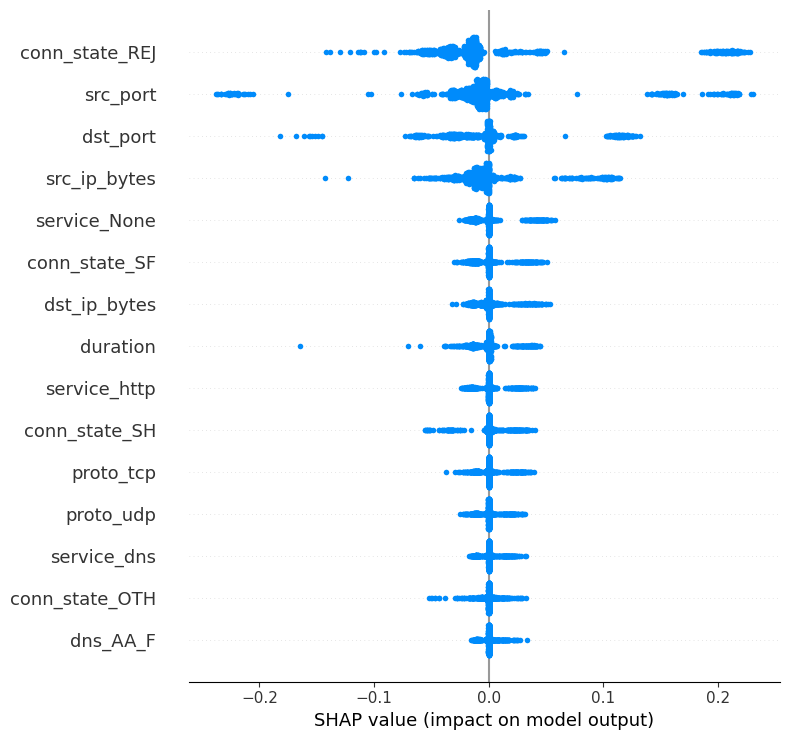

In [8]:
vals = shape_values[0]
# print the summary plot
shap.summary_plot(vals, feature_names= X.columns, max_display=15)

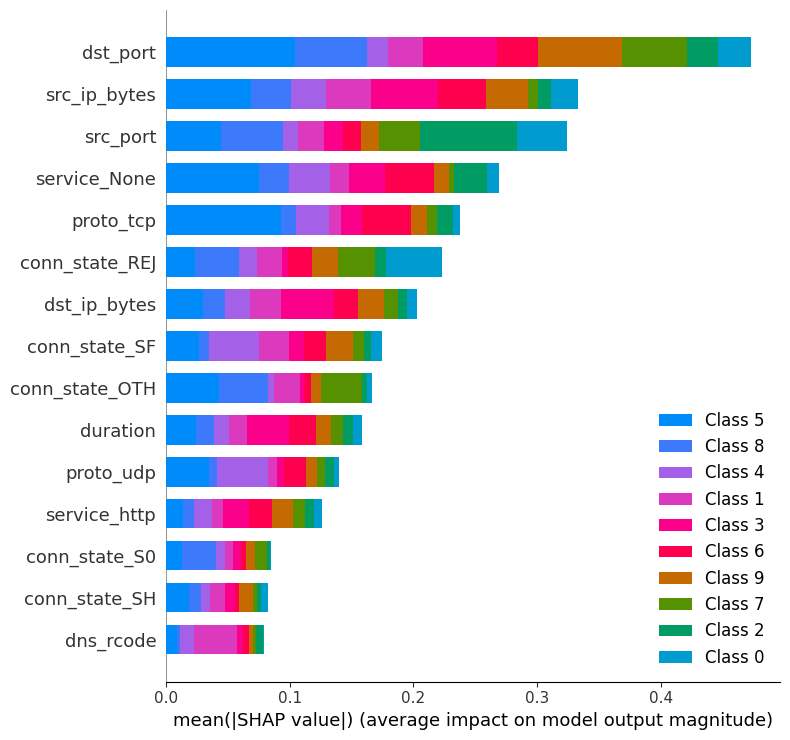

In [9]:
shap.summary_plot(shape_values,X_test2, feature_names= X.columns, max_display=15)

In [10]:
# get top 15 features
top_15 = np.argsort(np.sum(np.abs(vals), axis=0))[-15:]
print(top_15)

[35 22 15 11 10 33 18  2  7 32 12  6  1  0 23]


In [11]:
df2 = df.copy()
# keep only top 20 features
df2 = df2.iloc[:,top_15]
df2['type'] = df['type']
df2

,conn_state_SHR,service_ssl,service_dhcp,proto_tcp,proto_icmp,conn_state_SF,service_gssapi,duration,dst_ip_bytes,conn_state_S3,proto_udp,src_ip_bytes,dst_port,src_port,conn_state_OTH,type
0,False,False,False,True,False,False,False,175.726962,0.001470,False,False,86.672008,3.799303,0.101952,True,5.0
1,False,False,False,False,False,False,False,0.000000,0.000000,False,True,0.000366,1.118792,2.558822,False,5.0
2,False,False,False,True,False,False,False,0.000000,0.000000,False,False,0.000000,3.713672,0.101790,True,5.0
3,False,False,False,True,False,False,False,0.000000,0.000000,False,False,0.000000,0.753177,1.856906,True,5.0
4,True,False,False,False,False,False,False,0.000001,0.002205,False,True,0.000000,0.003801,2.523521,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,False,False,False,True,False,False,False,0.000000,0.000000,False,False,0.000302,0.005737,3.279039,False,9.0
2999996,False,False,False,False,False,True,False,0.000024,0.001046,False,True,0.000791,0.003801,1.823237,False,9.0
2999997,False,False,False,True,False,False,False,0.000000,0.000000,False,False,0.000302,0.005737,2.563471,False,9.0
2999998,False,False,False,True,False,False,False,0.000000,0.000000,False,False,0.000302,0.005737,1.853248,False,9.0


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time

X = df2.drop(['type'], axis=1)
y = df2['type']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(64, 3,activation="relu",input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, 3, activation="relu"))
# model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 3, activation="relu"))
model.add(Conv1D(128, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = ModelCheckpoint('shap_cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[mc])
end = time.time()
print("Time taken to train the model: ", end-start)

Epoch 1/10
74998/75000 [============================>.] - ETA: 0s - loss: 0.2811 - accuracy: 0.9173
Epoch 1: val_accuracy improved from -inf to 0.95610, saving model to shap_cnn_best_model.h5
75000/75000 [==============================] - 279s 4ms/step - loss: 0.2810 - accuracy: 0.9173 - val_loss: 0.1553 - val_accuracy: 0.9561
Epoch 2/10
   32/75000 [..............................] - ETA: 4:09 - loss: 0.1326 - accuracy: 0.9590

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


74990/75000 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9627
Epoch 2: val_accuracy improved from 0.95610 to 0.96295, saving model to shap_cnn_best_model.h5
75000/75000 [==============================] - 282s 4ms/step - loss: 0.1386 - accuracy: 0.9627 - val_loss: 0.1489 - val_accuracy: 0.9629
Epoch 3/10
74999/75000 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9689
Epoch 3: val_accuracy improved from 0.96295 to 0.97280, saving model to shap_cnn_best_model.h5
75000/75000 [==============================] - 441s 6ms/step - loss: 0.1201 - accuracy: 0.9689 - val_loss: 0.0957 - val_accuracy: 0.9728
Epoch 4/10
74998/75000 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9716
Epoch 4: val_accuracy improved from 0.97280 to 0.97774, saving model to shap_cnn_best_model.h5
75000/75000 [==============================] - 586s 8ms/step - loss: 0.1219 - accuracy: 0.9716 - val_loss: 0.0850 - val_accuracy: 0.9777
Epoch 5/10
7499

In [15]:
model = load_model('shap_cnn_best_model.h5')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("Time taken to predict: ", end-start)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

18750/18750 [==============================] - 48s 3ms/step
Time taken to predict:  52.06493091583252
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60144
           1       0.98      0.96      0.97     60079
           2       0.99      0.97      0.98     60047
           3       0.98      0.94      0.96     59974
           4       0.95      0.99      0.97     60175
           5       0.97      0.97      0.97     59762
           6       0.99      0.98      0.99     59631
           7       0.99      1.00      0.99     59909
           8       0.98      0.99      0.99     59992
           9       0.95      0.98      0.97     60287

    accuracy                           0.98    600000
   macro avg       0.98      0.98      0.98    600000
weighted avg       0.98      0.98      0.98    600000

0.9780333333333333


In [16]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Accuracy of each class:')
for i in range(cm.shape[0]):
    print(i, cm[i][i])

Accuracy of each class:
0 0.9989192604416068
1 0.9603022686795719
2 0.9652272386630473
3 0.9377730349818254
4 0.9877856252596593
5 0.9722566179177403
6 0.9844208549244521
7 0.9995660084461433
8 0.9898319775970129
9 0.9842088675833928
